Business Questions:

Which media channel (mobile, broadband, or SME) has the highest return on investment (ROI) for online conversions and revenue?

How can we predict the expected online revenue for each media channel given the conversion rate and clicks?

Can we identify any patterns or trends in the web traffic or online conversions for each media channel over time?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import FuncFormatter
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm
import time
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import ttest_ind

# Preprocessing of Data

In [2]:
df = pd.read_csv('Paid_Media.csv')

In [3]:
# Remove any leading or trailing white space from column names
df.columns = df.columns.str.strip()

In [4]:
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Week commencing               36 non-null     object 
 1   Mobile Web Traffic            36 non-null     object 
 2   Mobile Online Conversions     36 non-null     int64  
 3   Mobile Online Revenue         36 non-null     object 
 4   Mobile Ad-impression          36 non-null     object 
 5   Mobile Clicks                 36 non-null     object 
 6   Mobile Media Spend            36 non-null     object 
 7   Broadband Web Traffic         36 non-null     object 
 8   Broadband Online Conversions  36 non-null     int64  
 9   Broadband Online Revenue      36 non-null     object 
 10  Broadband Ad-impression       36 non-null     object 
 11  Broadband Clicks              36 non-null     object 
 12  Broadband Media Spend         36 non-null     object 
 13  SME Web

In [5]:
df['Week commencing'] = pd.to_datetime(df['Week commencing'], format='%d-%b-%y')

In [6]:
df['Mobile Web Traffic'] = df['Mobile Web Traffic'].str.replace(',', '')
df['Mobile Web Traffic'] = df['Mobile Web Traffic'].str.replace('$', '')
df['Mobile Web Traffic'] = df['Mobile Web Traffic'].str.strip()
df['Mobile Web Traffic'] = pd.to_numeric(df['Mobile Web Traffic'])

C:\Users\Shivraj\AppData\Local\Temp\ipykernel_5144\3603994398.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Mobile Web Traffic'] = df['Mobile Web Traffic'].str.replace('$', '')


In [7]:
df['Mobile Online Revenue'] = df['Mobile Online Revenue'].str.replace(',', '')
df['Mobile Online Revenue'] = df['Mobile Online Revenue'].str.replace('$', '')
df['Mobile Online Revenue'] = df['Mobile Online Revenue'].str.strip()
df['Mobile Online Revenue'] = pd.to_numeric(df['Mobile Online Revenue'])

C:\Users\Shivraj\AppData\Local\Temp\ipykernel_5144\1445129504.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Mobile Online Revenue'] = df['Mobile Online Revenue'].str.replace('$', '')


In [8]:
df['Mobile Ad-impression'] = df['Mobile Ad-impression'].str.replace(',', '')
df['Mobile Ad-impression'] = df['Mobile Ad-impression'].str.replace('$', '')
df['Mobile Ad-impression'] = df['Mobile Ad-impression'].str.strip()
df['Mobile Ad-impression'] = pd.to_numeric(df['Mobile Ad-impression'])

C:\Users\Shivraj\AppData\Local\Temp\ipykernel_5144\900808287.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Mobile Ad-impression'] = df['Mobile Ad-impression'].str.replace('$', '')


In [9]:
df['Mobile Clicks'] = df['Mobile Clicks'].str.replace(',', '')
df['Mobile Clicks'] = df['Mobile Clicks'].str.replace('$', '')
df['Mobile Clicks'] = df['Mobile Clicks'].str.strip()
df['Mobile Clicks'] = pd.to_numeric(df['Mobile Clicks'])

C:\Users\Shivraj\AppData\Local\Temp\ipykernel_5144\927807593.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Mobile Clicks'] = df['Mobile Clicks'].str.replace('$', '')


In [10]:
df['Mobile Media Spend'] = df['Mobile Media Spend'].str.replace(',', '')
df['Mobile Media Spend'] = df['Mobile Media Spend'].str.replace('$', '')
df['Mobile Media Spend'] = df['Mobile Media Spend'].str.strip()
df['Mobile Media Spend'] = pd.to_numeric(df['Mobile Media Spend'])

C:\Users\Shivraj\AppData\Local\Temp\ipykernel_5144\3845770276.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Mobile Media Spend'] = df['Mobile Media Spend'].str.replace('$', '')


In [11]:
df['Broadband Web Traffic'] = df['Broadband Web Traffic'].str.replace(',', '')
df['Broadband Web Traffic'] = df['Broadband Web Traffic'].str.replace('$', '')
df['Broadband Web Traffic'] = df['Broadband Web Traffic'].str.strip()
df['Broadband Web Traffic'] = pd.to_numeric(df['Broadband Web Traffic'])

C:\Users\Shivraj\AppData\Local\Temp\ipykernel_5144\1072107071.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Broadband Web Traffic'] = df['Broadband Web Traffic'].str.replace('$', '')


In [12]:
df['Broadband Online Revenue'] = df['Broadband Online Revenue'].str.replace(',', '')
df['Broadband Online Revenue'] = df['Broadband Online Revenue'].str.replace('$', '')
df['Broadband Online Revenue'] = df['Broadband Online Revenue'].str.strip()
df['Broadband Online Revenue'] = pd.to_numeric(df['Broadband Online Revenue'])

C:\Users\Shivraj\AppData\Local\Temp\ipykernel_5144\1394196388.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Broadband Online Revenue'] = df['Broadband Online Revenue'].str.replace('$', '')


In [13]:
df['Broadband Ad-impression'] = df['Broadband Ad-impression'].str.replace(',', '')
df['Broadband Ad-impression'] = df['Broadband Ad-impression'].str.replace('$', '')
df['Broadband Ad-impression'] = df['Broadband Ad-impression'].str.strip()
df['Broadband Ad-impression'] = pd.to_numeric(df['Broadband Ad-impression'])

C:\Users\Shivraj\AppData\Local\Temp\ipykernel_5144\4229626591.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Broadband Ad-impression'] = df['Broadband Ad-impression'].str.replace('$', '')


In [14]:
df['Broadband Clicks'] = df['Broadband Clicks'].str.replace(',', '')
df['Broadband Clicks'] = df['Broadband Clicks'].str.replace('$', '')
df['Broadband Clicks'] = df['Broadband Clicks'].str.strip()
df['Broadband Clicks'] = pd.to_numeric(df['Broadband Clicks'])

C:\Users\Shivraj\AppData\Local\Temp\ipykernel_5144\4090955698.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Broadband Clicks'] = df['Broadband Clicks'].str.replace('$', '')


In [15]:
df['Broadband Media Spend'] = df['Broadband Media Spend'].str.replace(',', '')
df['Broadband Media Spend'] = df['Broadband Media Spend'].str.replace('$', '')
df['Broadband Media Spend'] = df['Broadband Media Spend'].str.strip()
df['Broadband Media Spend'] = pd.to_numeric(df['Broadband Media Spend'])

C:\Users\Shivraj\AppData\Local\Temp\ipykernel_5144\1132940963.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Broadband Media Spend'] = df['Broadband Media Spend'].str.replace('$', '')


In [16]:
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Week commencing               36 non-null     datetime64[ns]
 1   Mobile Web Traffic            36 non-null     int64         
 2   Mobile Online Conversions     36 non-null     int64         
 3   Mobile Online Revenue         36 non-null     float64       
 4   Mobile Ad-impression          36 non-null     int64         
 5   Mobile Clicks                 36 non-null     int64         
 6   Mobile Media Spend            36 non-null     float64       
 7   Broadband Web Traffic         36 non-null     int64         
 8   Broadband Online Conversions  36 non-null     int64         
 9   Broadband Online Revenue      36 non-null     float64       
 10  Broadband Ad-impression       36 non-null     int64         
 11  Broadband Clicks              36 n

In [17]:
# Reset the index
df = df.reset_index(drop=True)

In [18]:
# Get a summary of the data
summary = df.describe()

In [19]:
# Print the summary and information
print('Data Summary:')
print(summary)
print('\nData Information:')
print(info)

Data Summary:
       Mobile Web Traffic  Mobile Online Conversions  Mobile Online Revenue  \
count           36.000000                  36.000000              36.000000   
mean         26321.138889                 186.111111          320751.449444   
std          14833.836749                  99.158683          215421.418613   
min           5331.000000                  40.000000           10575.800000   
25%          13878.750000                 122.750000          181161.105000   
50%          21993.500000                 170.000000          311635.500000   
75%          39001.250000                 224.750000          448146.495000   
max          60913.000000                 518.000000          975138.860000   

       Mobile Ad-impression  Mobile Clicks  Mobile Media Spend  \
count          3.600000e+01      36.000000           36.000000   
mean           2.091652e+06    5439.972222        15115.949167   
std            1.266626e+06    2811.127262         8134.379590   
min       

In [20]:
print(df)

   Week commencing  Mobile Web Traffic  Mobile Online Conversions  \
0       2022-06-27               19243                        128   
1       2022-07-04               14106                        109   
2       2022-07-11               13013                         96   
3       2022-07-18               11092                         96   
4       2022-07-25               12379                         88   
5       2022-08-01               12384                        145   
6       2022-08-08               16862                        217   
7       2022-08-15               21215                        205   
8       2022-08-22               14798                        195   
9       2022-08-29               18710                        171   
10      2022-09-05               35602                        418   
11      2022-09-12               49860                        518   
12      2022-09-19               36340                        313   
13      2022-09-26               3

# Correlation between Mobile and Broadband

In [21]:
# Extract the mobile and broadband variables into separate DataFrames
mobile_df = df[['Mobile Web Traffic', 'Mobile Online Revenue', 'Mobile Media Spend']]
broadband_df= df[['Broadband Web Traffic', 'Broadband Online Revenue', 'Broadband Media Spend']]

# Calculate the correlation matrix
mobile_correlations = mobile_df.corr()
broadband_correlations = broadband_df.corr()

# Print the correlation matrices
print('Mobile Correlations:\n', mobile_correlations)
print('\nBroadband Correlations:\n', broadband_correlations)

Mobile Correlations:
                        Mobile Web Traffic  Mobile Online Revenue  \
Mobile Web Traffic               1.000000               0.590423   
Mobile Online Revenue            0.590423               1.000000   
Mobile Media Spend              -0.416716              -0.164769   

                       Mobile Media Spend  
Mobile Web Traffic              -0.416716  
Mobile Online Revenue           -0.164769  
Mobile Media Spend               1.000000  

Broadband Correlations:
                           Broadband Web Traffic  Broadband Online Revenue  \
Broadband Web Traffic                  1.000000                  0.485549   
Broadband Online Revenue               0.485549                  1.000000   
Broadband Media Spend                  0.216686                 -0.068137   

                          Broadband Media Spend  
Broadband Web Traffic                  0.216686  
Broadband Online Revenue              -0.068137  
Broadband Media Spend                  1.000

## Correlation coefficient between Mobile and Broadband Website traffic

In [22]:
# Create a new DataFrame with only the relevant columns
web_traffic = df[['Week commencing', 'Mobile Web Traffic', 'Broadband Web Traffic']]
web_traffic = web_traffic.dropna()  # Remove rows with missing values

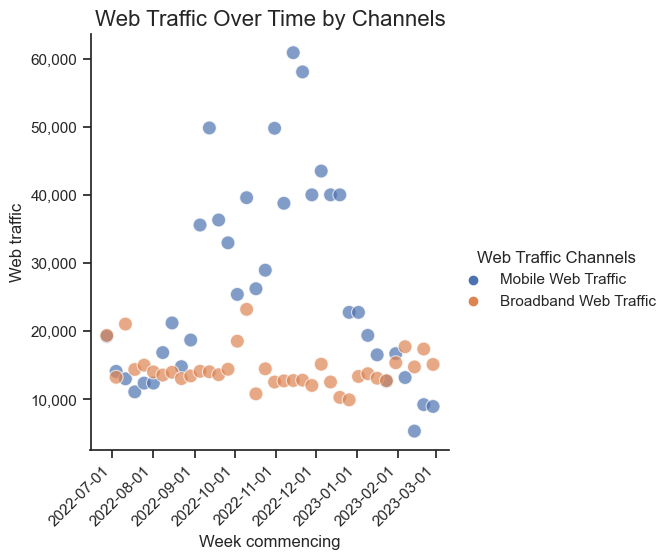

In [23]:
# Convert "Week commencing" to a datetime object
web_traffic['Week commencing'] = pd.to_datetime(web_traffic['Week commencing'])

# Convert non-numeric values to NaN
df['Broadband Web Traffic'] = pd.to_numeric(df['Broadband Web Traffic'], errors='coerce')

# Melt the DataFrame to create a tidy format
web_traffic_tidy = web_traffic.melt(id_vars=['Week commencing'], var_name='Web Traffic Channels', value_name='Web traffic')

# Set the figure size and style
sns.set(rc={"figure.figsize":(12, 6)})
sns.set_style("ticks")

# Plot the tidy data
g = sns.relplot(data=web_traffic_tidy, x='Week commencing', y='Web traffic', hue='Web Traffic Channels', kind='scatter', markers='o', s=100, alpha=0.7)

# Customize the x-axis date format
g.ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels by 45 degrees and align them to the center
plt.xticks(rotation=45, ha='right')

# Add comma separators to y-axis labels
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Add a title to the plot
plt.title("Web Traffic Over Time by Channels", fontsize=16)

# Show the plot
plt.show()


## Trends in mobile and broadband web traffic

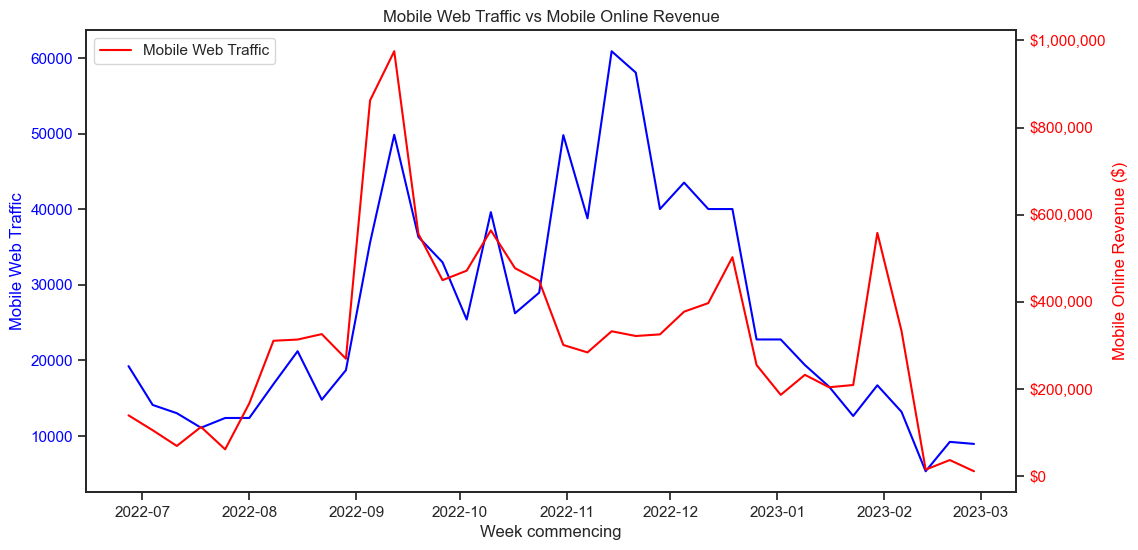

In [24]:
# Create a figure and axis object
fig, ax1 = plt.subplots()

# Create the first plot for Mobile Web Traffic
ax1.plot(df['Week commencing'], df['Mobile Web Traffic'], color='blue')
ax1.set_xlabel('Week commencing')
ax1.set_ylabel('Mobile Web Traffic', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second plot for Mobile Online Revenue
ax2 = ax1.twinx()
ax2.plot(df['Week commencing'], df['Mobile Online Revenue'], color='red')
ax2.set_ylabel('Mobile Online Revenue ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set y-tick labels for Mobile Online Revenue
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax2.yaxis.set_major_formatter(tick)

# Set the title and legend
plt.title('Mobile Web Traffic vs Mobile Online Revenue')
plt.legend(['Mobile Web Traffic', 'Mobile Online Revenue'], loc='upper left')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

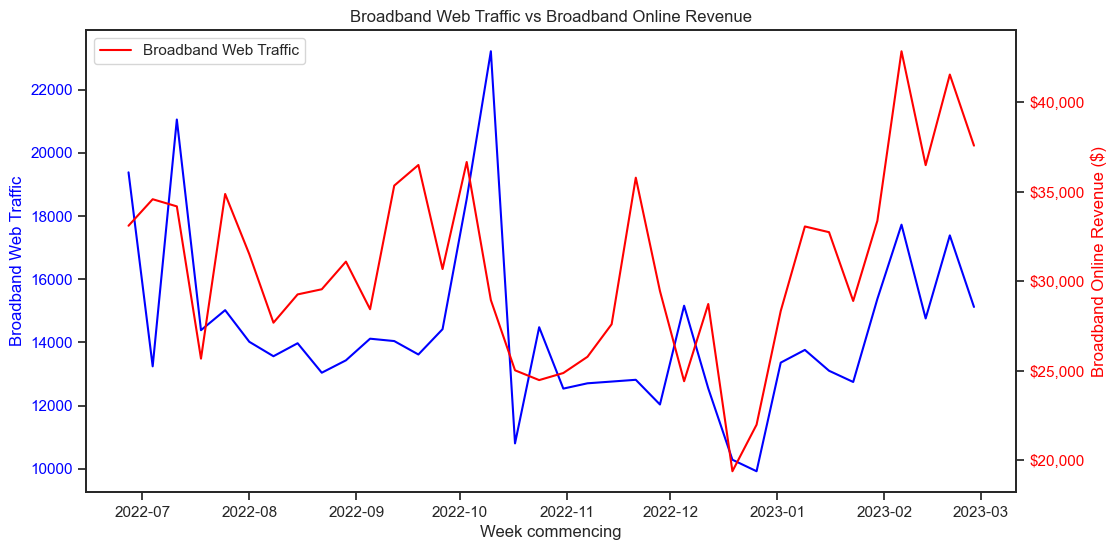

In [25]:
# Create a figure and axis object
fig, ax1 = plt.subplots()

# Create the first plot for Mobile Web Traffic
ax1.plot(df['Week commencing'], df['Broadband Web Traffic'], color='blue')
ax1.set_xlabel('Week commencing')
ax1.set_ylabel('Broadband Web Traffic', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create the second plot for Mobile Online Revenue
ax2 = ax1.twinx()
ax2.plot(df['Week commencing'], df['Broadband Online Revenue'], color='red')
ax2.set_ylabel('Broadband Online Revenue ($)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set y-tick labels for Mobile Online Revenue
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax2.yaxis.set_major_formatter(tick)

# Set the title and legend
plt.title('Broadband Web Traffic vs Broadband Online Revenue')
plt.legend(['Broadband Web Traffic', 'Broadband Online Revenue'], loc='upper left')

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [26]:
# Convert non-numeric values to NaN
df['Mobile Web Traffic'] = pd.to_numeric(df['Mobile Web Traffic'], errors='coerce')
df['Broadband Web Traffic'] = pd.to_numeric(df['Broadband Web Traffic'], errors='coerce')

# Calculate the correlation coefficient between the two variables
correlation_coefficient = df['Mobile Web Traffic'].corr(df['Broadband Web Traffic'])

# Print the correlation coefficient
print(correlation_coefficient)

-0.22408118215189995


# Findings

## ROAS (Return on Advertising Spend) 

In [27]:
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Week commencing               36 non-null     datetime64[ns]
 1   Mobile Web Traffic            36 non-null     int64         
 2   Mobile Online Conversions     36 non-null     int64         
 3   Mobile Online Revenue         36 non-null     float64       
 4   Mobile Ad-impression          36 non-null     int64         
 5   Mobile Clicks                 36 non-null     int64         
 6   Mobile Media Spend            36 non-null     float64       
 7   Broadband Web Traffic         36 non-null     int64         
 8   Broadband Online Conversions  36 non-null     int64         
 9   Broadband Online Revenue      36 non-null     float64       
 10  Broadband Ad-impression       36 non-null     int64         
 11  Broadband Clicks              36 n

In [28]:
df['SME Book a Call - CONFIRMED'] = df['SME Book a Call - CONFIRMED'].astype(float)
df['Mobile Media Spend'] = df['Mobile Media Spend'].astype(float)
df['Broadband Media Spend'] = df['Broadband Media Spend'].astype(float)

In [29]:
# Calculate ROAS for each week
df['ROAS'] = (df['Mobile Online Revenue'] + df['Broadband Online Revenue'] + df['SME Book a Call - CONFIRMED']) / (df['Mobile Media Spend'] + df['Broadband Media Spend'] + df['SME Media Spend'])

# Print ROAS for each week
print(df[['Week commencing', 'ROAS']])

   Week commencing       ROAS
0       2022-06-27   2.707525
1       2022-07-04   8.734830
2       2022-07-11   2.520467
3       2022-07-18   2.823031
4       2022-07-25   2.545935
5       2022-08-01   5.476907
6       2022-08-08   8.699801
7       2022-08-15   7.808909
8       2022-08-22   7.485731
9       2022-08-29   5.743497
10      2022-09-05  23.248401
11      2022-09-12  19.272508
12      2022-09-19   9.248411
13      2022-09-26   7.697563
14      2022-10-03  10.463570
15      2022-10-10   8.662498
16      2022-10-17  10.508326
17      2022-10-24   8.921620
18      2022-10-31  10.726281
19      2022-11-07  11.401080
20      2022-11-14  11.193604
21      2022-11-21  10.603158
22      2022-11-28   9.431853
23      2022-12-05   9.341583
24      2022-12-12  12.492311
25      2022-12-19  14.619950
26      2022-12-26   5.865057
27      2023-01-02   4.558281
28      2023-01-09   5.817251
29      2023-01-16   5.308655
30      2023-01-23   6.521501
31      2023-01-30  12.933982
32      20

## Point of diminishing return

In [30]:
# Calculate and plot the rolling mean of total revenue
rolling_mean = df['Mobile Online Revenue'].rolling(window=3).mean()
plt.plot(df['Mobile Web Traffic'], rolling_mean, label='Rolling Mean', color='red')

# Find the point of diminishing returns for mobile clicks
for i in range(1, len(df)):
    if rolling_mean[i] - rolling_mean[i-1] < 0:
        print('Point of diminishing returns for Mobile Web Traffic:', df['Mobile Web Traffic'][i-1])
        plt.axvline(x=df['Mobile Web Traffic'][i-1], color='black', linestyle='--')
        break
  

Point of diminishing returns for Mobile Web Traffic: 13013


In [31]:
# Calculate and plot the rolling mean of total revenue
rolling_mean = df['Broadband Online Revenue'].rolling(window=3).mean()
plt.plot(df['Broadband Web Traffic'], rolling_mean, label='Rolling Mean', color='red')

# Find the point of diminishing returns for mobile clicks
for i in range(1, len(df)):
    if rolling_mean[i] - rolling_mean[i-1] < 0:
        print('Point of diminishing returns for Broadband Web Traffic:', df['Broadband Web Traffic'][i-1])
        plt.axvline(x=df['Broadband Web Traffic'][i-1], color='black', linestyle='--')
        break
        

Point of diminishing returns for Broadband Web Traffic: 21054


In [32]:
# Calculate and plot the rolling mean of total revenue
rolling_mean = df['SME Book a Call - CONFIRMED'].rolling(window=3).mean()
plt.plot(df['SME Book a Call - START'], rolling_mean, label='Rolling Mean', color='red')

# Find the point of diminishing returns for mobile clicks
for i in range(1, len(df)):
    if rolling_mean[i] - rolling_mean[i-1] < 0:
        print('Point of diminishing returns for SME Book a Call - START:', df['SME Book a Call - START'][i-1])
        plt.axvline(x=df['SME Book a Call - START'][i-1], color='black', linestyle='--')
        break
        

Point of diminishing returns for SME Book a Call - START: 949


In [34]:
# Calculate marginal returns
df['marginal_returns'] = df['Mobile Online Revenue'].diff() / df['Mobile Media Spend'].diff()

In [35]:
# Find point of diminishing returns
point_of_diminishing_returns = df.iloc[df['marginal_returns'].idxmax()]['Mobile Media Spend']
print("Point of Diminishing Returns (Mobile Media Spend):$", point_of_diminishing_returns)

Point of Diminishing Returns (Mobile Media Spend):$ 10585.78


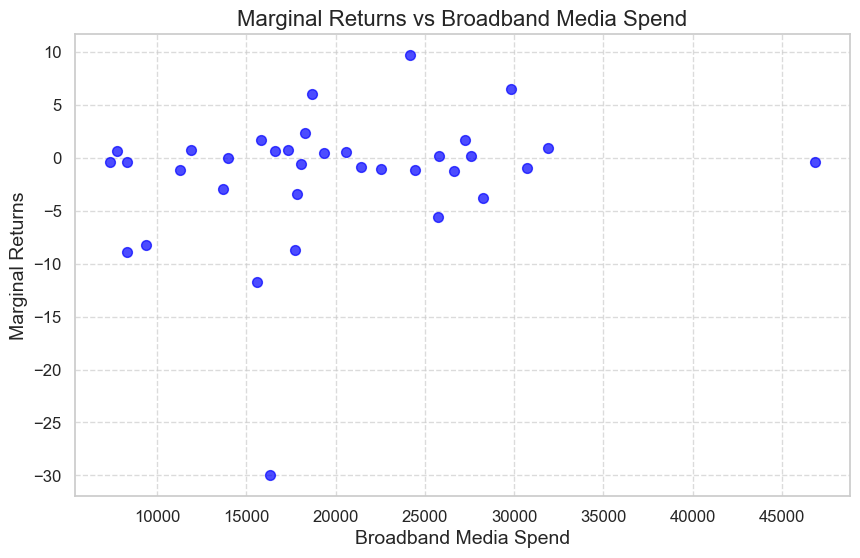

Point of Diminishing Returns (Broadband Media Spend):$ 24184.28


In [37]:
# Calculate marginal returns
df['marginal_returns_BB'] = df['Broadband Online Revenue'].diff() / df['Broadband Media Spend'].diff()

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot marginal returns against Mobile Media Spend
plt.scatter(df['Broadband Media Spend'], df['marginal_returns_BB'], marker='o', s=50, c='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Broadband Media Spend', fontsize=14)
plt.ylabel('Marginal Returns', fontsize=14)
plt.title('Marginal Returns vs Broadband Media Spend', fontsize=16)

# Customize the tick labels' font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add horizontal and vertical gridlines
plt.grid(axis='both', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Find point of diminishing returns
point_of_diminishing_returns = df.iloc[df['marginal_returns_BB'].idxmax()]['Broadband Media Spend']
print("Point of Diminishing Returns (Broadband Media Spend):$", point_of_diminishing_returns)

# Data Visualisation

## Mobile online conversions and broadband online conversions

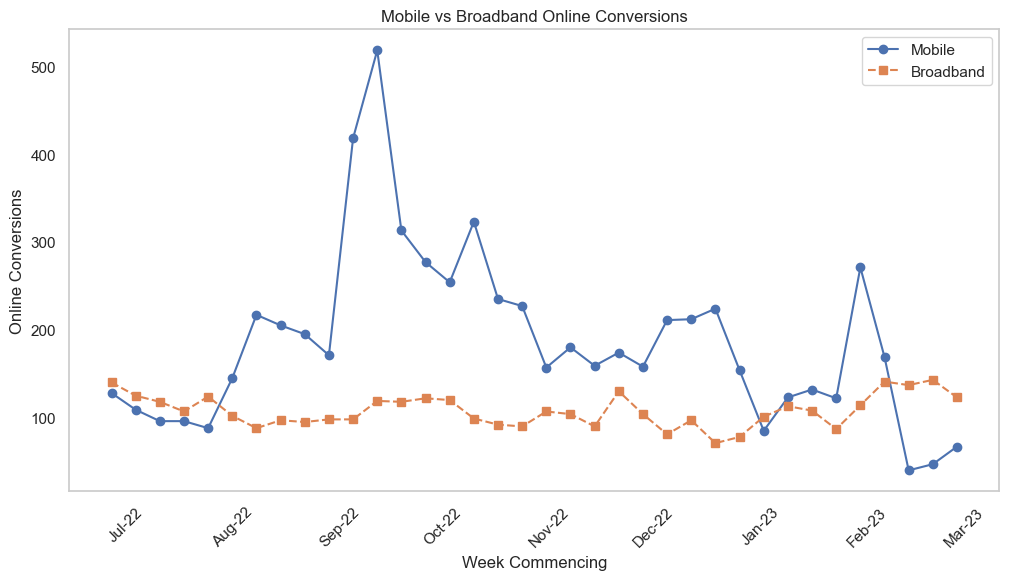

In [38]:
# Filter columns for mobile and broadband web traffic
mobile_traffic = df[['Week commencing', 'Mobile Online Conversions']]
broadband_traffic = df[['Week commencing', 'Broadband Online Conversions']]

# Create line plots
plt.plot(mobile_traffic['Week commencing'], mobile_traffic['Mobile Online Conversions'], marker='o', linestyle='-', label='Mobile')
plt.plot(broadband_traffic['Week commencing'], broadband_traffic['Broadband Online Conversions'], marker='s', linestyle='--', label='Broadband')

# Add title and axis labels
plt.title('Mobile vs Broadband Online Conversions')
plt.xlabel('Week Commencing')
plt.ylabel('Online Conversions')

# Format x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Add grid
plt.grid()

# Show plot
plt.show()

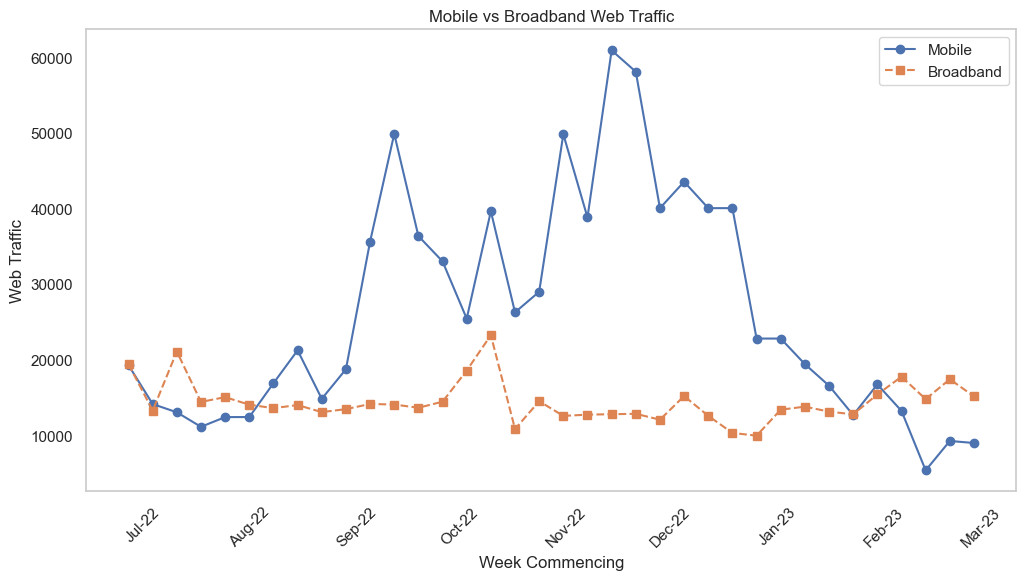

In [39]:
# Filter columns for mobile and broadband web traffic
mobile_traffic = df[['Week commencing', 'Mobile Web Traffic']]
broadband_traffic = df[['Week commencing', 'Broadband Web Traffic']]

# Create line plots
plt.plot(mobile_traffic['Week commencing'], mobile_traffic['Mobile Web Traffic'], marker='o', linestyle='-', label='Mobile')
plt.plot(broadband_traffic['Week commencing'], broadband_traffic['Broadband Web Traffic'], marker='s', linestyle='--', label='Broadband')

# Add title and axis labels
plt.title('Mobile vs Broadband Web Traffic')
plt.xlabel('Week Commencing')
plt.ylabel('Web Traffic')

# Format x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# Add legend
plt.legend()

# Add grid
plt.grid()

# Show plot
plt.show()

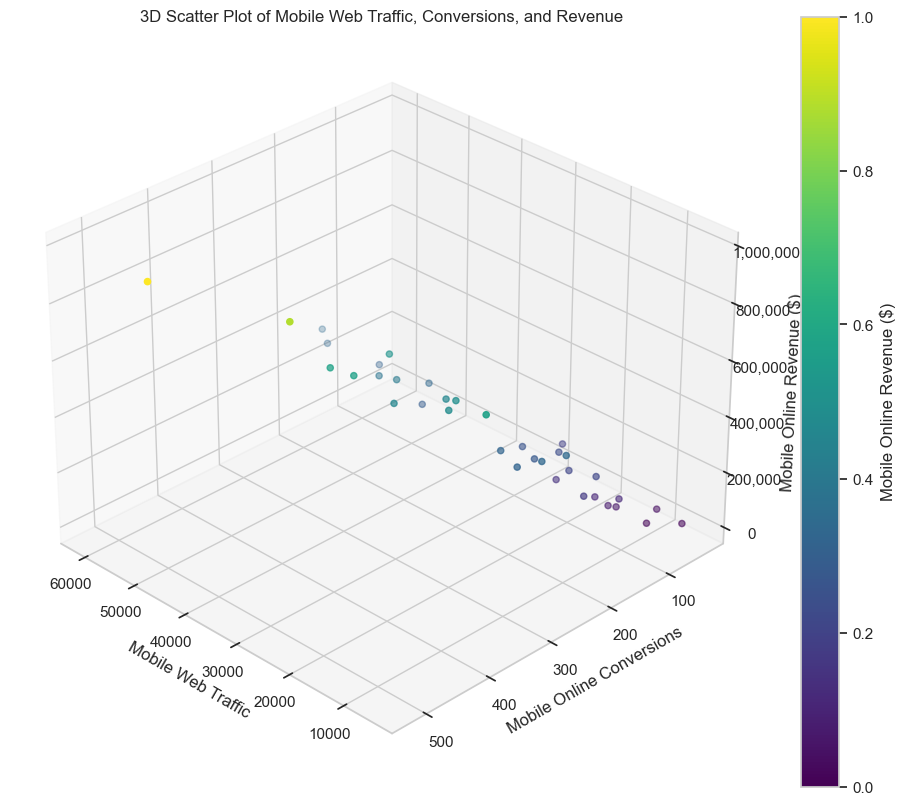

In [40]:
# Define a formatter function to format the z-axis tick labels with commas
def comma_formatter(x, pos):
    return '{:,.0f}'.format(x)

# Create a 3D scatter plot for Broadband web traffic, conversions, and revenue
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
colors = cm.viridis(df['Mobile Online Revenue'] / df['Mobile Online Revenue'].max())
ax.scatter(df['Mobile Web Traffic'], df['Mobile Online Conversions'], df['Mobile Online Revenue'], c=colors)
cbar = plt.colorbar(cm.ScalarMappable(cmap=cm.viridis), ax=ax)
cbar.set_label('Mobile Online Revenue ($)')

ax.grid(True)
ax.view_init(elev=30, azim=135)
ax.set_xlabel('Mobile Web Traffic')
ax.set_ylabel('Mobile Online Conversions')
ax.set_zlabel('Mobile Online Revenue ($)')
ax.set_title('3D Scatter Plot of Mobile Web Traffic, Conversions, and Revenue')

# Format the z-axis tick labels with the comma_formatter function
ax.zaxis.set_major_formatter(FuncFormatter(comma_formatter))

plt.show()


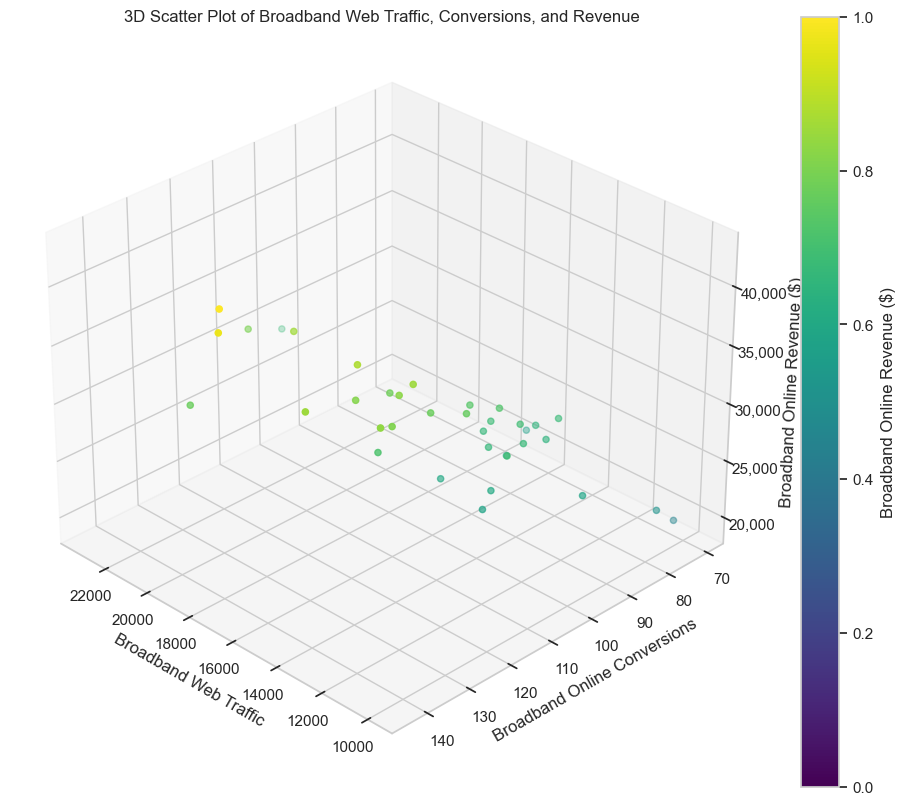

In [41]:
# Define a formatter function to format the z-axis tick labels with commas
def comma_formatter(x, pos):
    return '{:,.0f}'.format(x)

# Create a 3D scatter plot for Broadband web traffic, conversions, and revenue
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
colors = cm.viridis(df['Broadband Online Revenue'] / df['Broadband Online Revenue'].max())
ax.scatter(df['Broadband Web Traffic'], df['Broadband Online Conversions'], df['Broadband Online Revenue'], c=colors)
cbar = plt.colorbar(cm.ScalarMappable(cmap=cm.viridis), ax=ax)
cbar.set_label('Broadband Online Revenue ($)')

ax.grid(True)
ax.view_init(elev=30, azim=135)
ax.set_xlabel('Broadband Web Traffic')
ax.set_ylabel('Broadband Online Conversions')
ax.set_zlabel('Broadband Online Revenue ($)')
ax.set_title('3D Scatter Plot of Broadband Web Traffic, Conversions, and Revenue')

# Format the z-axis tick labels with the comma_formatter function
ax.zaxis.set_major_formatter(FuncFormatter(comma_formatter))

plt.show()


## Silhouette Plot

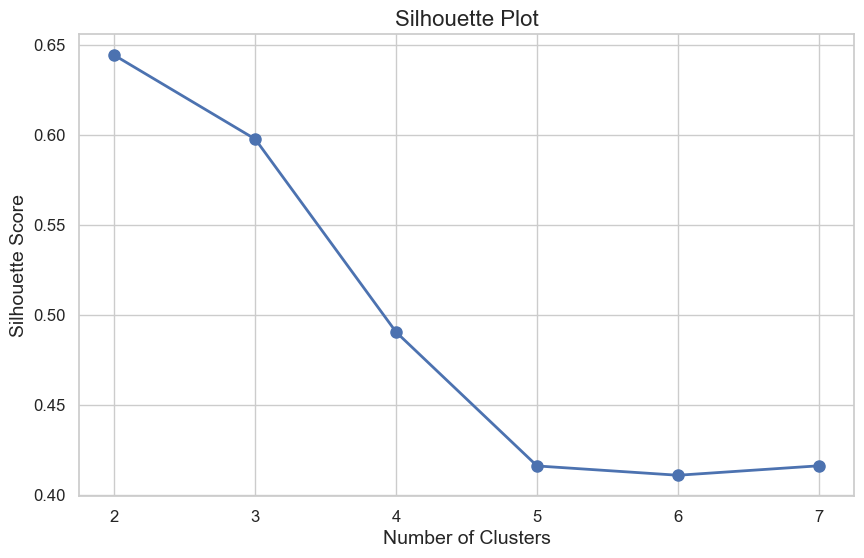

In [42]:
# Define the features
X = df[['Mobile Web Traffic', 'Mobile Online Conversions', 'Broadband Web Traffic', 'Broadband Online Conversions']]

# Define the range of cluster numbers to try
range_n_clusters = range(2, 8)

# Calculate the Silhouette score for each number of clusters
silhouette_scores = []
for n_clusters in range_n_clusters:
    # Create a KMeans model with n_clusters
    model = KMeans(n_clusters=n_clusters, random_state=0)
    # Fit the model to the data
    cluster_labels = model.fit_predict(X)
    # Calculate the Silhouette score for the current number of clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Set the figure size and color palette
sns.set(rc={"figure.figsize":(10, 6)})
sns.set_style("whitegrid")

# Plot the Silhouette scores for each number of clusters
plt.plot(range_n_clusters, silhouette_scores, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.title('Silhouette Plot', fontsize=16)

# Customize the tick labels' font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show plot
plt.show()

## Violin Plot

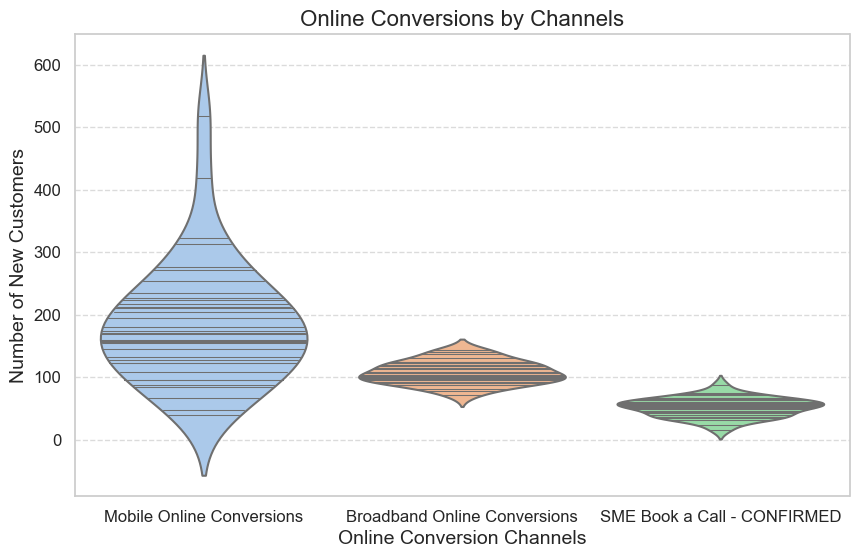

In [43]:
# Set the figure size, color palette, and style
sns.set(rc={"figure.figsize":(10, 6)})
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create the plot
sns.violinplot(data=df[['Mobile Online Conversions', 'Broadband Online Conversions', 'SME Book a Call - CONFIRMED']], inner='stick', scale='width')


# Add labels and title
plt.xlabel('Online Conversion Channels', fontsize=14)
plt.ylabel('Number of New Customers', fontsize=14)
plt.title('Online Conversions by Channels', fontsize=16)

# Customize the tick labels' font size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add horizontal gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

## Descriptive Statistics, Scatterplot Matrix and Boxplots Visualisation

In [44]:
# Calculate the descriptive statistics for each variable
print(df.describe())

# Calculate the correlation between variables
print(df.corr())

       Mobile Web Traffic  Mobile Online Conversions  Mobile Online Revenue  \
count           36.000000                  36.000000              36.000000   
mean         26321.138889                 186.111111          320751.449444   
std          14833.836749                  99.158683          215421.418613   
min           5331.000000                  40.000000           10575.800000   
25%          13878.750000                 122.750000          181161.105000   
50%          21993.500000                 170.000000          311635.500000   
75%          39001.250000                 224.750000          448146.495000   
max          60913.000000                 518.000000          975138.860000   

       Mobile Ad-impression  Mobile Clicks  Mobile Media Spend  \
count          3.600000e+01      36.000000           36.000000   
mean           2.091652e+06    5439.972222        15115.949167   
std            1.266626e+06    2811.127262         8134.379590   
min            4.186130e

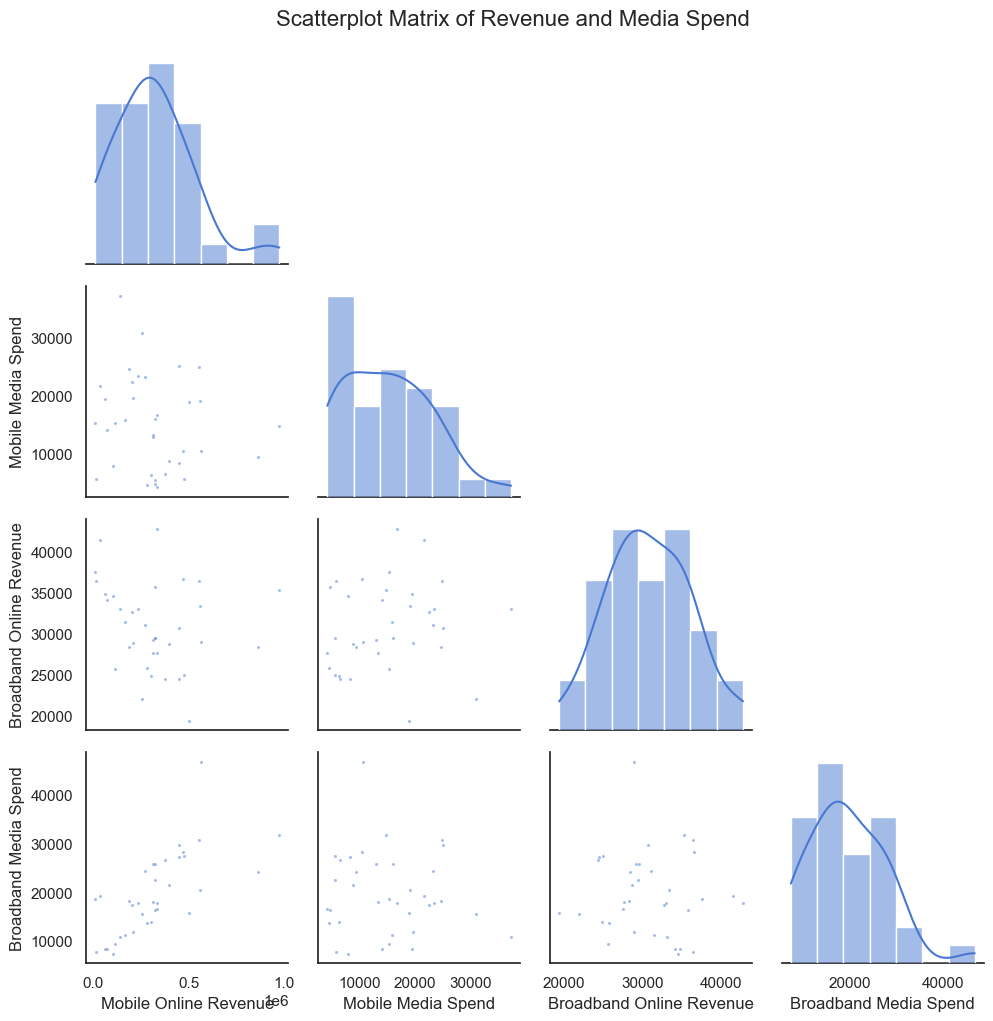

In [45]:

# Select the columns of interest
cols = ['Mobile Online Revenue', 'Mobile Media Spend', 'Broadband Online Revenue', 'Broadband Media Spend']

# Customize the style, color palette, and marker style
sns.set(style='white', palette='muted', color_codes=True)
markers = ['o', 's', '^', '*']

# Create a scatterplot matrix with labeled axes, sublabels, and diagonal histograms
g = sns.PairGrid(df[cols], diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot, s=5, alpha=0.5)
g.map_diag(sns.histplot, kde=True)

# Add a title
plt.suptitle('Scatterplot Matrix of Revenue and Media Spend', fontsize=16, y=1.02)

plt.show()

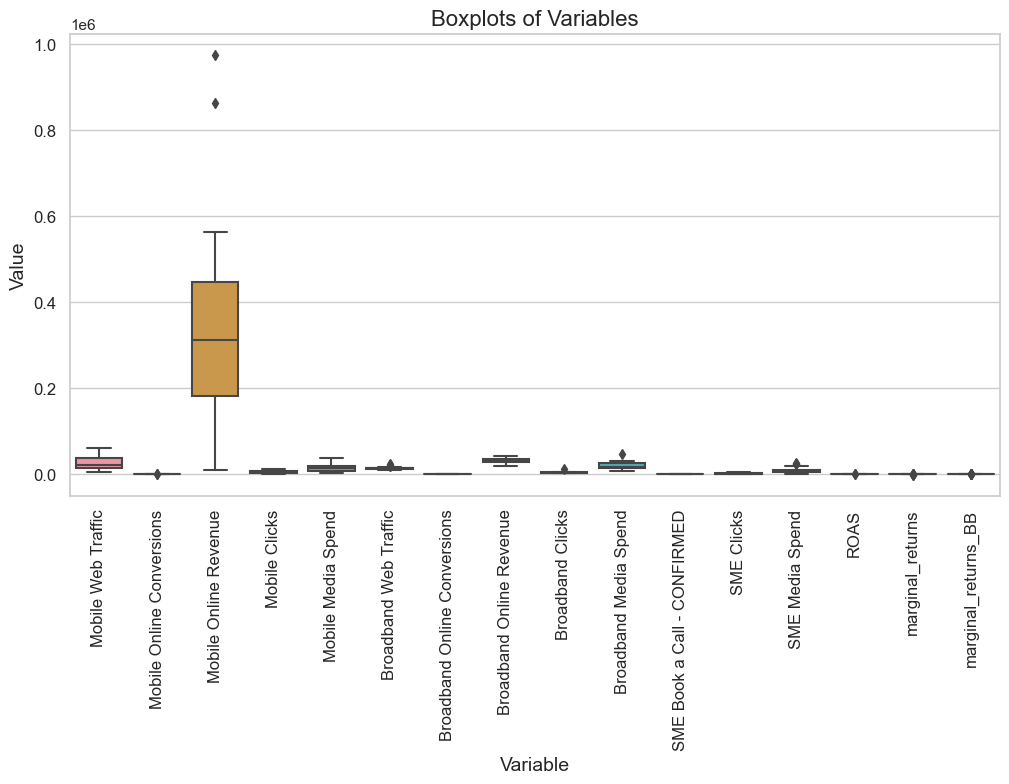

In [46]:
# Set the figure size, color palette, and style
df_filtered = df.drop(columns=['Mobile Ad-impression', 'Broadband Ad-impression', 'SME Ad-impression'])
# Set the figure size, color palette, and style
sns.set(rc={"figure.figsize":(12, 6)})
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create boxplots to visualize the distribution of each variable
ax = sns.boxplot(data=df_filtered)

# Add labels and title
plt.xlabel('Variable', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Boxplots of Variables', fontsize=16)

# Customize the tick labels' font size
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)

# Show the plot
plt.show()

C:\Users\Shivraj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


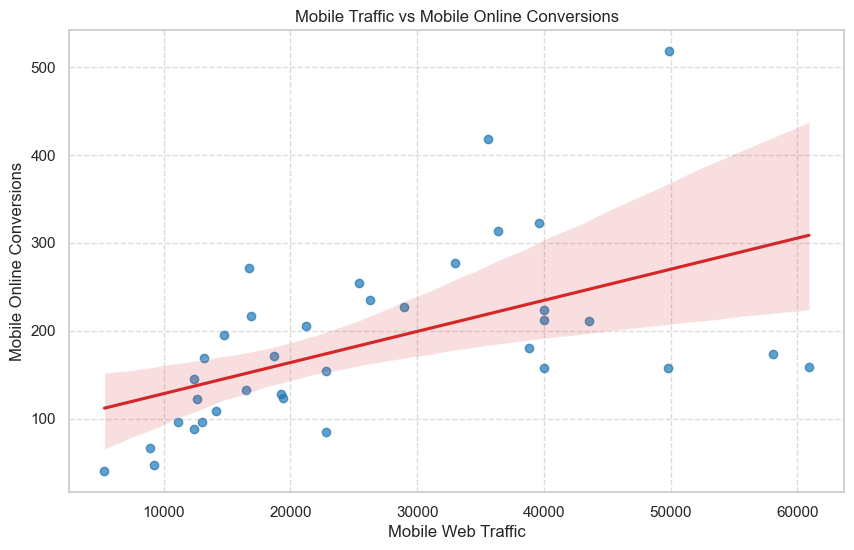

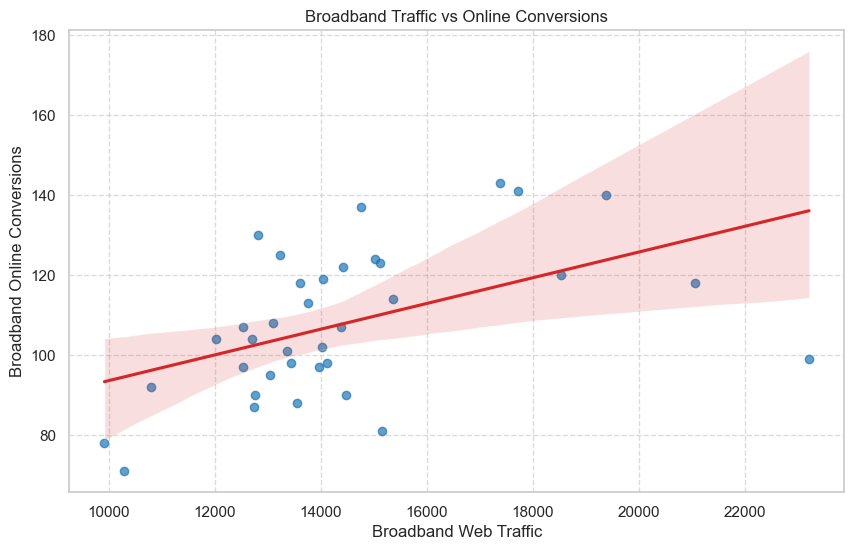

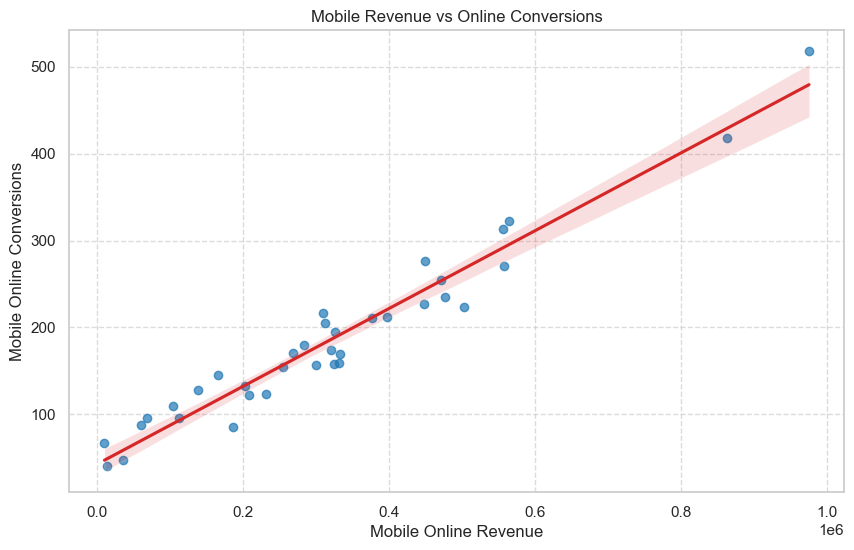

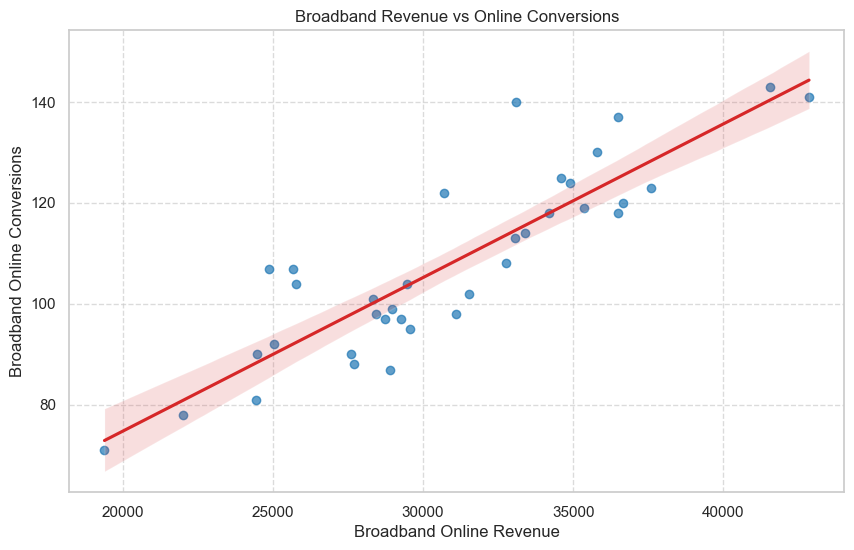

In [47]:
def plot_scatter(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    sns.regplot(x, y, scatter_kws={'color': 'tab:blue', 'alpha': 0.7}, line_kws={'color': 'tab:red'})
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

plot_scatter(df['Mobile Web Traffic'], df['Mobile Online Conversions'], 'Mobile Web Traffic', 'Mobile Online Conversions', 'Mobile Traffic vs Mobile Online Conversions')
plot_scatter(df['Broadband Web Traffic'], df['Broadband Online Conversions'], 'Broadband Web Traffic', 'Broadband Online Conversions', 'Broadband Traffic vs Online Conversions')
plot_scatter(df['Mobile Online Revenue'], df['Mobile Online Conversions'], 'Mobile Online Revenue', 'Mobile Online Conversions', 'Mobile Revenue vs Online Conversions')
plot_scatter(df['Broadband Online Revenue'], df['Broadband Online Conversions'], 'Broadband Online Revenue', 'Broadband Online Conversions', 'Broadband Revenue vs Online Conversions')

Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 160225689600.0000 - mae: 311860.5938 - val_loss: 100281237504.0000 - val_mae: 308991.6562
Epoch 2/50
1/1 [==============================] - 0s 258ms/step - loss: 160225673216.0000 - mae: 311860.5938 - val_loss: 100281237504.0000 - val_mae: 308991.6562
Epoch 3/50
1/1 [==============================] - 0s 124ms/step - loss: 160225656832.0000 - mae: 311860.5625 - val_loss: 100281229312.0000 - val_mae: 308991.6562
Epoch 4/50
1/1 [==============================] - 0s 215ms/step - loss: 160225640448.0000 - mae: 311860.5625 - val_loss: 100281221120.0000 - val_mae: 308991.6562
Epoch 5/50
1/1 [==============================] - 0s 144ms/step - loss: 160225624064.0000 - mae: 311860.5312 - val_loss: 100281212928.0000 - val_mae: 308991.6562
Epoch 6/50
1/1 [==============================] - 0s 100ms/step - loss: 160225607680.0000 - mae: 311860.5312 - val_loss: 100281212928.0000 - val_mae: 308991.6562
Epoch 7/50
1/1 [===============

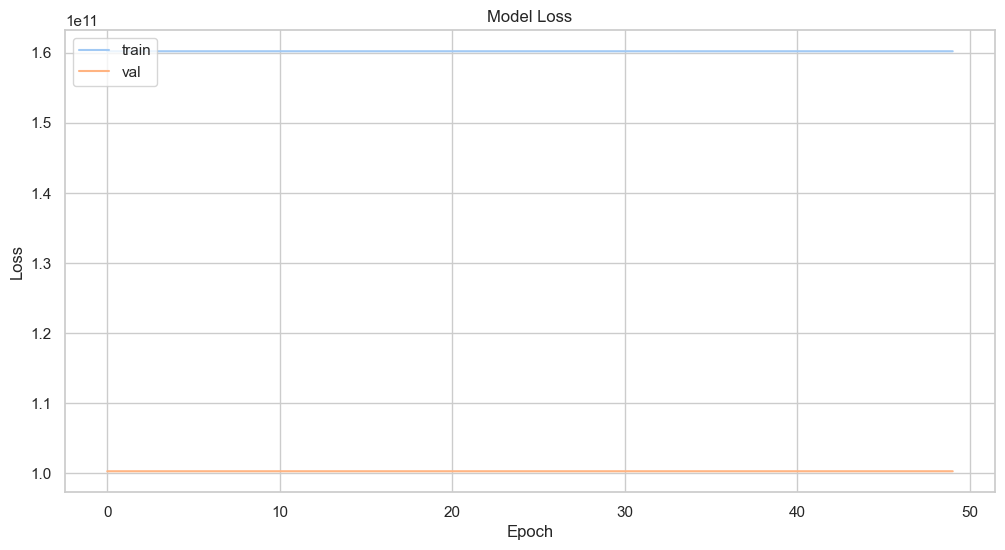

In [48]:
# Select the input features and output variable
X = df[['Mobile Online Conversions', 'Mobile Media Spend']].values
y = df['Mobile Online Revenue'].values

# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Normalize the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Define the model architecture
model = Sequential()
model.add(Dense(64, input_shape=(2,), activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

# Evaluate the model on the testing data
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}')

# Plot the training and validation loss over time

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Random Forest Regression model

In [49]:
# Select the input features and output variable
X = df[['Mobile Media Spend', 'Broadband Media Spend']].values
y = df['Mobile Online Revenue'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Evaluate the model on the testing data
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Test MSE: {mse}, Test MAE: {mae}')

Test MSE: 17372594944.73925, Test MAE: 98246.66082499994


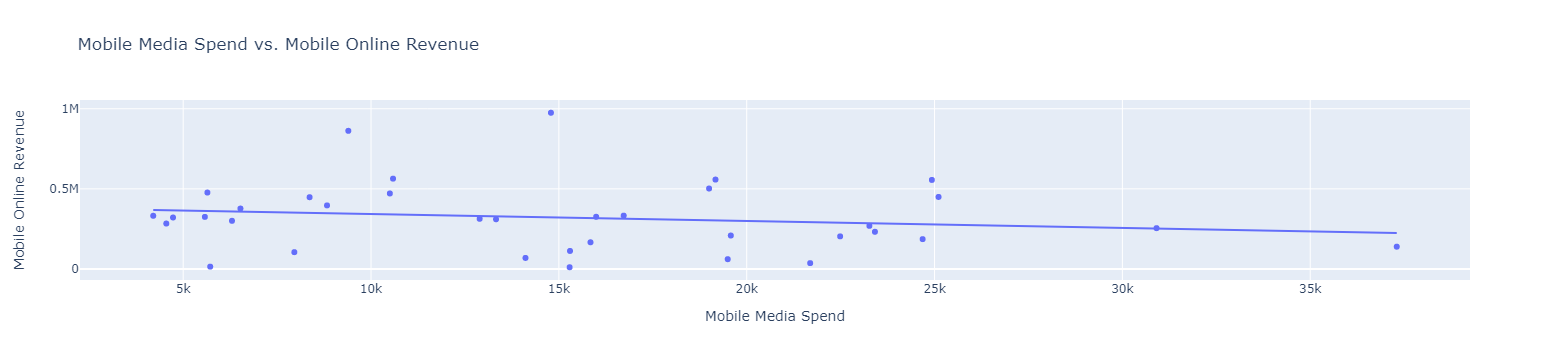

In [50]:
import plotly.express as px

# Create an interactive scatter plot of mobile media spend vs. mobile online revenue
fig = px.scatter(df, x='Mobile Media Spend', y='Mobile Online Revenue', trendline='ols',
                 title='Mobile Media Spend vs. Mobile Online Revenue')
fig.show()

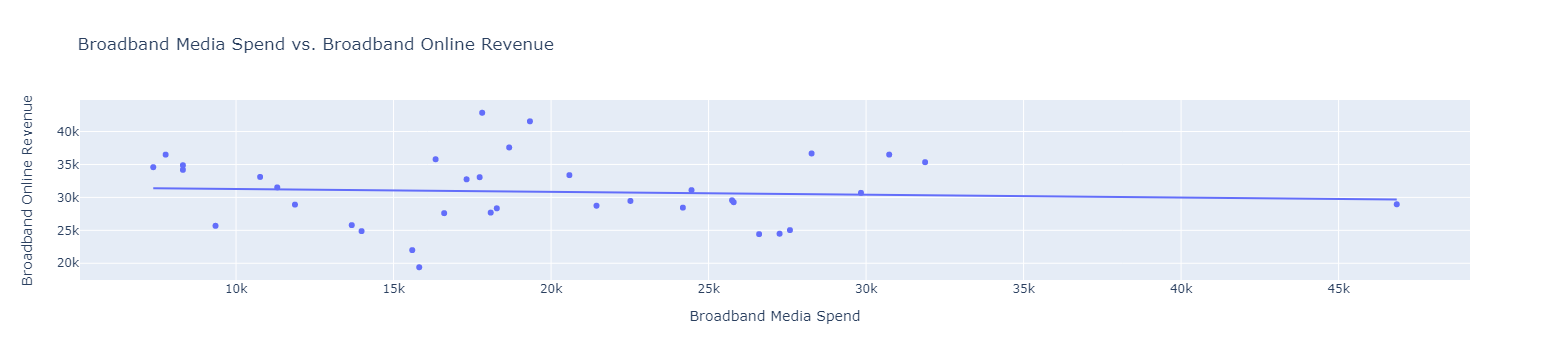

In [51]:
# Create an interactive scatter plot of Broadband media spend vs. Broadband online revenue
fig = px.scatter(df, x='Broadband Media Spend', y='Broadband Online Revenue', trendline='ols',
                 title='Broadband Media Spend vs. Broadband Online Revenue')
fig.show()

In [52]:
df['Total Media Spend'] = df['Mobile Media Spend'] + df['Broadband Media Spend'] + df['SME Media Spend']


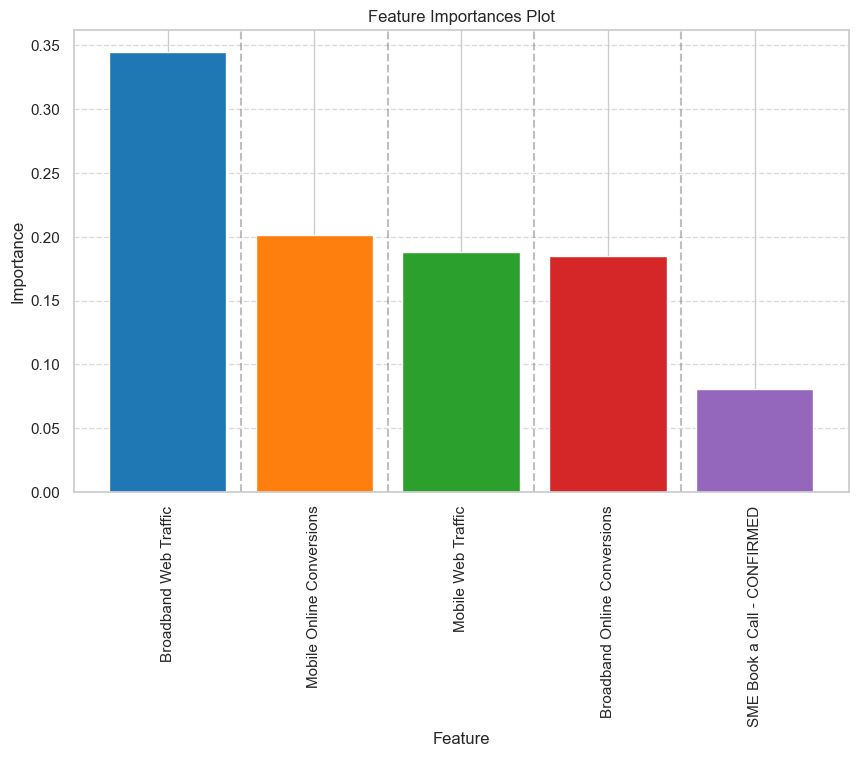

In [53]:
from sklearn.ensemble import RandomForestRegressor

# Define the features and target variable
X = df[['Mobile Web Traffic', 'Mobile Online Conversions', 'Broadband Web Traffic', 'Broadband Online Conversions', 'SME Book a Call - CONFIRMED']]
y = df['Total Media Spend']

# Fit a random forest model to the data
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X, y)

# Calculate the feature importances
importances = model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], color=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'])
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances Plot')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i in range(1, X.shape[1]):
    plt.axvline(x=i - 0.5, color='gray', linestyle='--', alpha=0.5)

plt.show()

## Clustering analysis

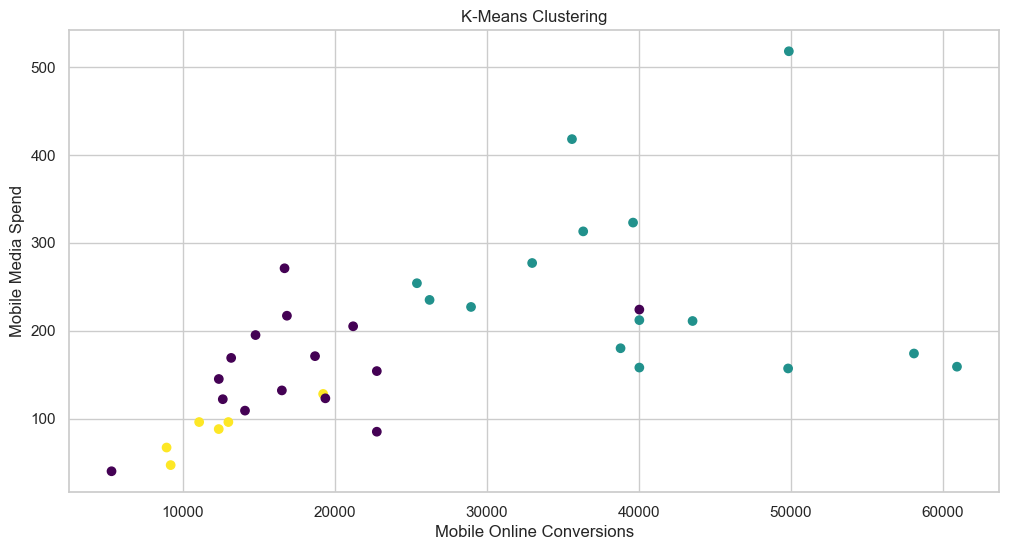

In [54]:
# Convert columns to float and remove commas
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '').astype(float)
    else:
        continue

# Fill NaN values with 0
df.fillna(0, inplace=True)

    
# Select the relevant columns for clustering
X = df.iloc[:, 1:].values.astype(float)

# Scale the values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.xlabel('Mobile Online Conversions')
plt.ylabel('Mobile Media Spend')
plt.title('K-Means Clustering')
plt.show()

In [55]:
df.head()

Week commencing  Mobile Web Traffic  Mobile Online Conversions  \
0      2022-06-27               19243                        128   
1      2022-07-04               14106                        109   
2      2022-07-11               13013                         96   
3      2022-07-18               11092                         96   
4      2022-07-25               12379                         88   

   Mobile Online Revenue  Mobile Ad-impression  Mobile Clicks  \
0              138957.91               5329459           9824   
1              104775.39               1374278           3126   
2               68696.51               4375709           5347   
3              112357.14               3121620           4616   
4               60918.12               3900365           4380   

   Mobile Media Spend  Broadband Web Traffic  Broadband Online Conversions  \
0            37302.78                  19382                           140   
1             7958.96                  13241                           125   
2            14111.38                  21054                           118   
3            15296.86                  14385                           107   
4            19494.55                  15019                           124   

   Broadband Online Revenue  ...  SME Web Traffic  SME Book a Call - START  \
0                  33106.05  ...          10412.0                   1049.0   
1                  34586.36  ...           9452.0                    813.0   
2                  34187.10  ...          10542.0                    949.0   
3                  25685.70  ...           9454.0                    739.0   
4                  34879.87  ...           9000.0                    900.0   

   SME Book a Call - CONFIRMED  SME Ad-impression  SME Clicks  \
0                         59.0            2348449        4677   
1                         61.0              75432          56   
2                         66.0            1881829        6022   
3                         43.0            4797835        5606   
4                         88.0            2121273        3102   

   SME Media Spend      ROAS  marginal_returns  marginal_returns_BB  \
0       15505.6200  2.707525          0.000000             0.000000   
1         631.5315  8.734830          1.164897            -0.436354   
2       18421.7600  2.520467         -5.864177            -0.424248   
3       24268.7700  2.823031         36.829495            -8.205193   
4        9854.9930  2.545935        -12.254125            -8.878452   

   Total Media Spend  
0         63572.0600  
1         15961.7015  
2         40845.4500  
3         48914.0400  
4         37662.3930  

[5 rows x 23 columns]

In [56]:
# Add the cluster labels to the DataFrame
df['Cluster'] = y_kmeans

# Group the data by cluster and calculate the mean for each column
cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

         Mobile Web Traffic  Mobile Online Conversions  Mobile Online Revenue  \
Cluster                                                                         
0              17829.933333                 157.466667          265404.432667   
1              40414.400000                 254.400000          475879.027333   
2              12316.000000                  87.000000           71300.046667   

         Mobile Ad-impression  Mobile Clicks  Mobile Media Spend  \
Cluster                                                            
0                2.557321e+06    6829.733333        18064.083333   
1                1.067329e+06    3771.866667        10002.038000   
2                3.488286e+06    6135.833333        20530.391667   

         Broadband Web Traffic  Broadband Online Conversions  \
Cluster                                                        
0                 13485.800000                    103.666667   
1                 14251.666667                    104.733333 

## Autoencoder

In [57]:
# Drop the date column
data = df.drop('Week commencing', axis=1)

# Split the data into training and test sets
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

# Scale the data
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

# Build the Autoencoder model
input_dim = train_data_scaled.shape[1]
encoding_dim = 8
input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Train the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(train_data_scaled, train_data_scaled, 
                epochs=50, batch_size=32, shuffle=True, 
                validation_data=(test_data_scaled, test_data_scaled))

Epoch 1/50
1/1 [==============================] - 7s 7s/step - loss: 1.0070 - val_loss: 0.6806
Epoch 2/50
1/1 [==============================] - 0s 129ms/step - loss: 1.0049 - val_loss: 0.6796
Epoch 3/50
1/1 [==============================] - 0s 147ms/step - loss: 1.0028 - val_loss: 0.6786
Epoch 4/50
1/1 [==============================] - 0s 93ms/step - loss: 1.0008 - val_loss: 0.6776
Epoch 5/50
1/1 [==============================] - 0s 145ms/step - loss: 0.9988 - val_loss: 0.6766
Epoch 6/50
1/1 [==============================] - 0s 118ms/step - loss: 0.9969 - val_loss: 0.6756
Epoch 7/50
1/1 [==============================] - 0s 296ms/step - loss: 0.9949 - val_loss: 0.6746
Epoch 8/50
1/1 [==============================] - 0s 186ms/step - loss: 0.9930 - val_loss: 0.6736
Epoch 9/50
1/1 [==============================] - 0s 110ms/step - loss: 0.9911 - val_loss: 0.6726
Epoch 10/50
1/1 [==============================] - 0s 92ms/step - loss: 0.9893 - val_loss: 0.6717
Epoch 11/50
1/1 [=======

## Principal component analysis (PCA): 

In [58]:
# extract the features
X = data.iloc[:, 1:]

# standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# perform PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)


# Add the principal components to the dataframe
df['PC1'] = principal_components[:, 0]
df['PC2'] = principal_components[:, 1]

# create a new dataframe with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# concatenate the new dataframe with the original data
final_df = pd.concat([data.iloc[:, 0], principal_df], axis=1)

# print the final dataframe
print(final_df)

    Mobile Web Traffic       PC1       PC2
0                19243  4.429689  0.386514
1                14106  0.395121  2.081586
2                13013  4.567649 -0.870604
3                11092  4.392369 -0.779644
4                12379  3.993881  0.233628
5                12384  1.756312  1.295444
6                16862 -0.321670  0.318116
7                21215 -1.829864  0.435907
8                14798 -1.596981  0.855381
9                18710 -1.157840  1.876755
10               35602 -4.332001 -1.301530
11               49860 -4.528912 -1.938822
12               36340 -1.597929 -0.768647
13               32984 -1.312152 -0.339175
14               25409 -1.068987 -1.864288
15               39617 -3.517716 -5.041395
16               26240 -1.750007 -1.595024
17               28966 -1.197120 -1.662962
18               49811 -0.079032 -0.630036
19               38796 -0.288334 -1.356028
20               60913 -0.106210 -1.754727
21               58086  1.503213 -2.437932
22         

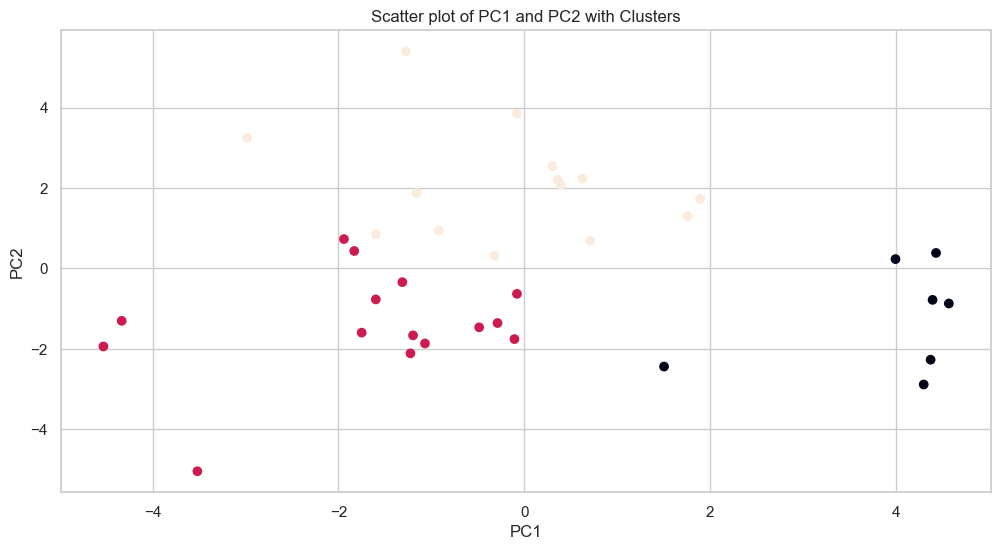

In [59]:
# Identify the clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(df[['PC1', 'PC2']])
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Create a scatter plot of PC1 and PC2 with colored clusters
plt.scatter(df['PC1'], df['PC2'], c=labels)

# Add axis labels
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Scatter plot of PC1 and PC2 with Clusters')

# Show the plot
plt.show()

# Machine Learning Models

## Regression Analysis

In [60]:
print(df)

   Week commencing  Mobile Web Traffic  Mobile Online Conversions  \
0       2022-06-27               19243                        128   
1       2022-07-04               14106                        109   
2       2022-07-11               13013                         96   
3       2022-07-18               11092                         96   
4       2022-07-25               12379                         88   
5       2022-08-01               12384                        145   
6       2022-08-08               16862                        217   
7       2022-08-15               21215                        205   
8       2022-08-22               14798                        195   
9       2022-08-29               18710                        171   
10      2022-09-05               35602                        418   
11      2022-09-12               49860                        518   
12      2022-09-19               36340                        313   
13      2022-09-26               3

In [61]:
# Split the data into features and target variables
X = df.drop(["Mobile Online Revenue", "Broadband Online Revenue", "Week commencing"], axis=1)
y_mobile = df["Mobile Online Revenue"]
y_broadband = df["Broadband Online Revenue"]

# Drop any rows with missing values
X = X.dropna()

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_mobile, test_size=0.2, random_state=0)


In [62]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict revenue on the test set
y_pred = model.predict(X_test)

In [63]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

MSE: 8.21836364051445e-18
R-squared: 1.0


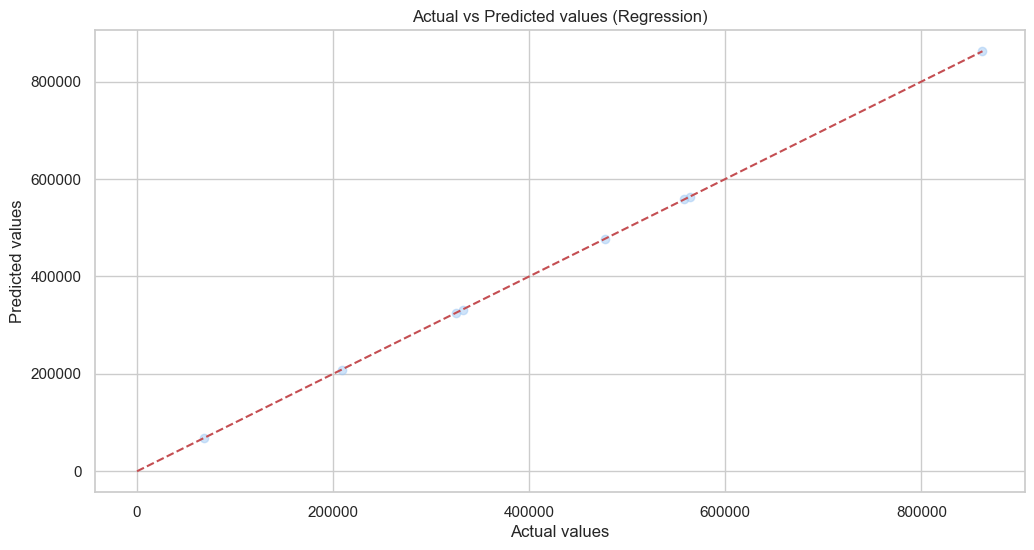

In [64]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values (Regression)')
plt.show()

## Cook's Distance plot

In [65]:
import statsmodels.api as sm

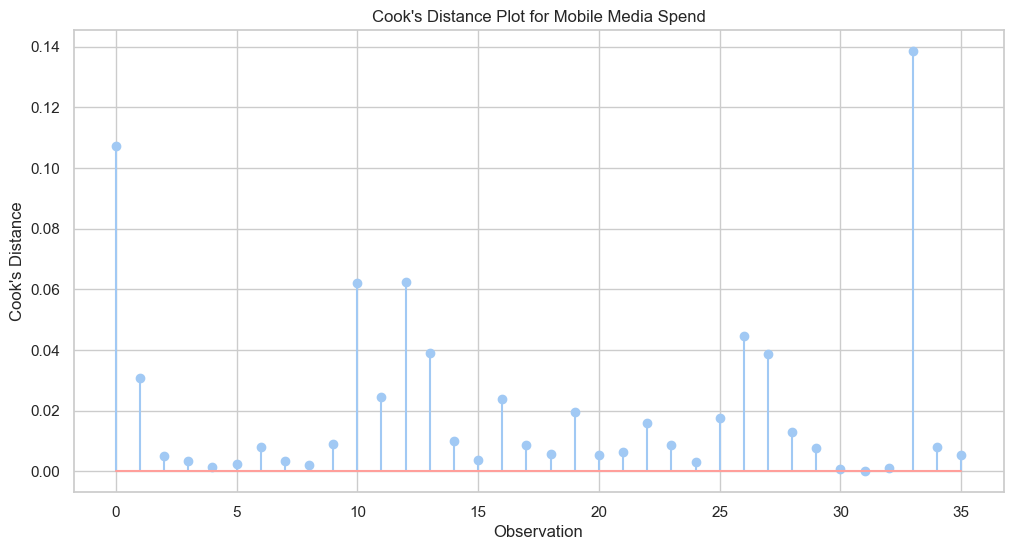

In [66]:
# Define the dependent variable
y = df['Mobile Media Spend']

# Define the independent variables
X = df[['Mobile Web Traffic', 'Mobile Online Conversions']]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit an OLS model to the data
model = sm.OLS(y, X).fit()

# Calculate the Cook's distance values for each observation
influence = model.get_influence()
cooks_distance = influence.cooks_distance[0]

# Plot the Cook's distance values for each observation
plt.stem(cooks_distance)
plt.xlabel('Observation')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot for Mobile Media Spend")
plt.show()

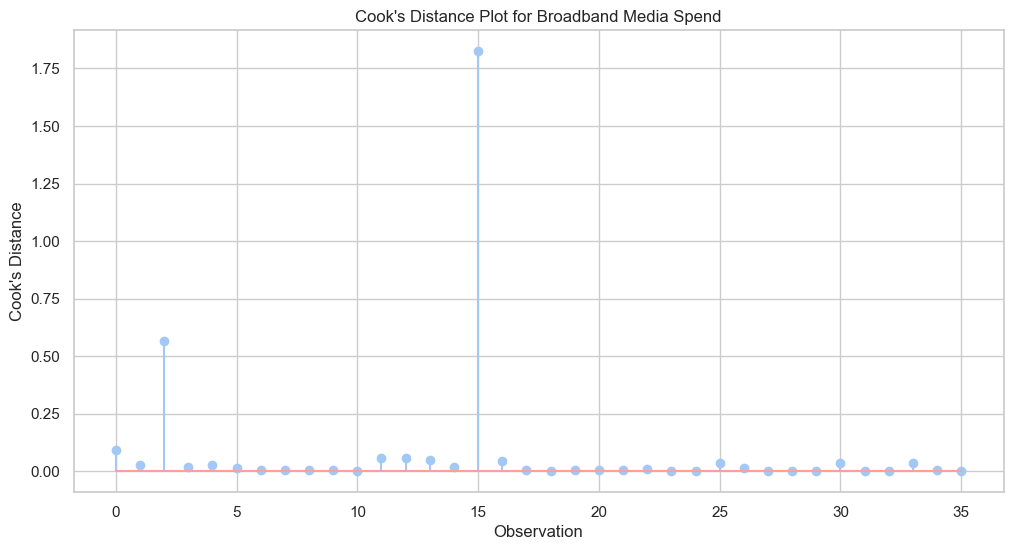

In [67]:
# Define the dependent variable
y = df['Broadband Media Spend']

# Define the independent variables
X = df[['Broadband Web Traffic', 'Broadband Online Conversions']]

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit an OLS model to the data
model = sm.OLS(y, X).fit()

# Calculate the Cook's distance values for each observation
influence = model.get_influence()
cooks_distance = influence.cooks_distance[0]

# Plot the Cook's distance values for each observation
plt.stem(cooks_distance)
plt.xlabel('Observation')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot for Broadband Media Spend")
plt.show()

## Linear Regression

In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_mobile, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the ROI on the testing data
y_pred = model.predict(X_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mobile ROI:')
print('R^2 score:', r2)
print('MSE:', mse)

Mobile ROI:
R^2 score: -0.4574829525022295
MSE: 46743432087.011856


In [69]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_broadband, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the ROI on the testing data
y_pred = model.predict(X_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Broadband ROI:')
print('R^2 score:', r2)
print('MSE:', mse)

Broadband ROI:
R^2 score: 0.7799838783428708
MSE: 6128333.699415295


In [70]:
## Learning Curve using Linear Regression model

In [71]:
print(df)

   Week commencing  Mobile Web Traffic  Mobile Online Conversions  \
0       2022-06-27               19243                        128   
1       2022-07-04               14106                        109   
2       2022-07-11               13013                         96   
3       2022-07-18               11092                         96   
4       2022-07-25               12379                         88   
5       2022-08-01               12384                        145   
6       2022-08-08               16862                        217   
7       2022-08-15               21215                        205   
8       2022-08-22               14798                        195   
9       2022-08-29               18710                        171   
10      2022-09-05               35602                        418   
11      2022-09-12               49860                        518   
12      2022-09-19               36340                        313   
13      2022-09-26               3

In [72]:
# Convert columns to float and remove commas
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        df[col] = df[col].str.replace(',', '').astype(float)
    else:
        continue

In [73]:
# Define the target variable
target = 'Mobile Online Revenue'

# Split the data into train and test sets
X = df.drop(['Week commencing', target], axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
def plot_learning_curve(model, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    
    train_scores_mean = np.mean(-train_scores, axis=1)
    train_scores_std = np.std(-train_scores, axis=1)
    test_scores_mean = np.mean(-test_scores, axis=1)
    test_scores_std = np.std(-test_scores, axis=1)
    
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Mean Squared Error")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt


Mean Squared Error on test data (Mobile Online Revenue): 3.117860216311479e-11


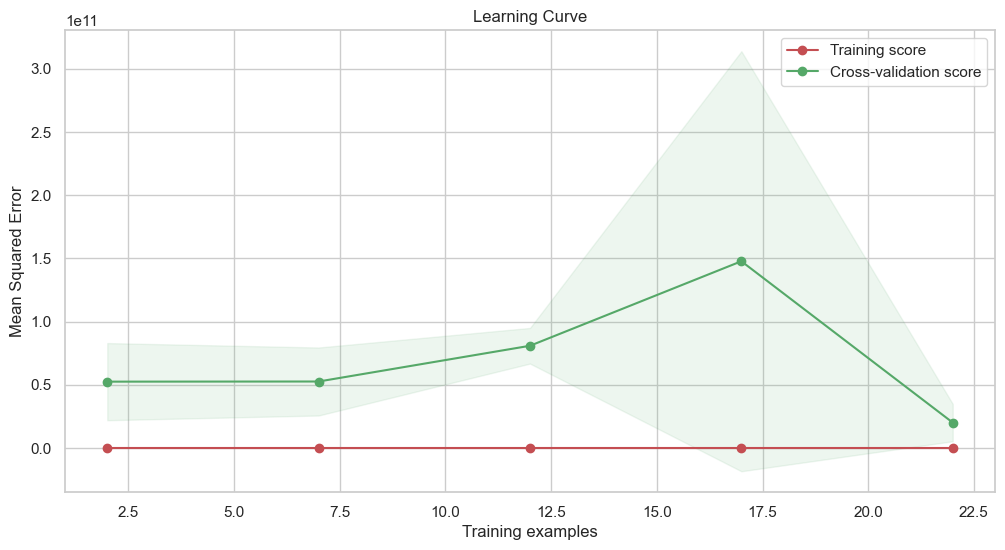

In [75]:
     
# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test data (Mobile Online Revenue):", mse)

# Plot the learning curve
plot_learning_curve(model, X_train, y_train)
plt.show()

In [76]:
# Define the target variable
target = 'Mobile Online Conversions'

# Split the data into train and test sets
X = df.drop(['Week commencing', target], axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def plot_learning_curve(model, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    
    train_scores_mean = np.mean(-train_scores, axis=1)
    train_scores_std = np.std(-train_scores, axis=1)
    test_scores_mean = np.mean(-test_scores, axis=1)
    test_scores_std = np.std(-test_scores, axis=1)
    
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Mean Squared Error")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt


Mean Squared Error on test data (Mobile Online Conversions): 9.2638170154187e-23


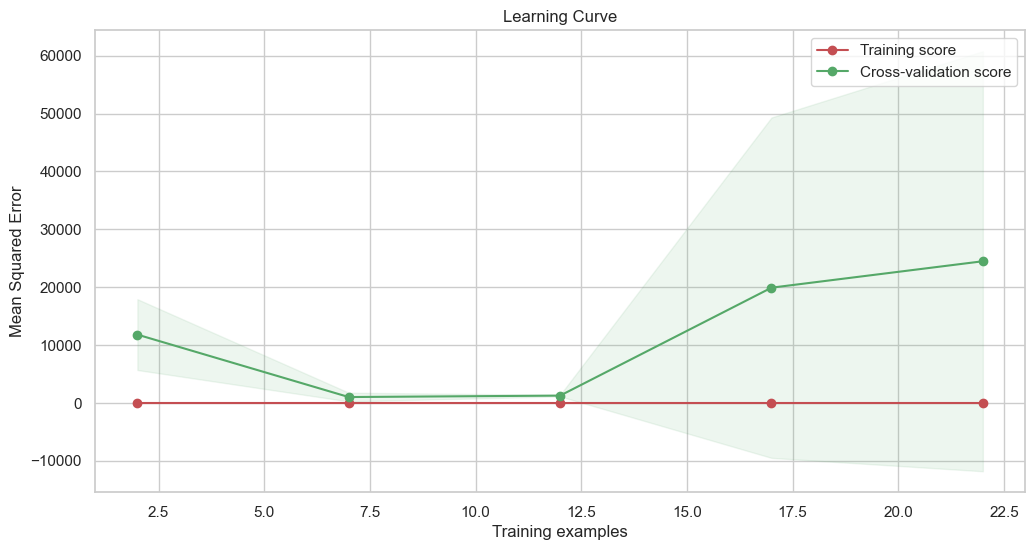

In [77]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test data (Mobile Online Conversions):", mse)

# Plot the learning curve
plot_learning_curve(model, X_train, y_train)
plt.show()

In [78]:
# Define the target variable
target = 'Broadband Online Conversions'

# Split the data into train and test sets
X = df.drop(['Week commencing', target], axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def plot_learning_curve(model, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    
    train_scores_mean = np.mean(-train_scores, axis=1)
    train_scores_std = np.std(-train_scores, axis=1)
    test_scores_mean = np.mean(-test_scores, axis=1)
    test_scores_std = np.std(-test_scores, axis=1)
    
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Mean Squared Error")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt


Mean Squared Error on test data (Broadband Online Conversions): 1.7143501362352804e-20


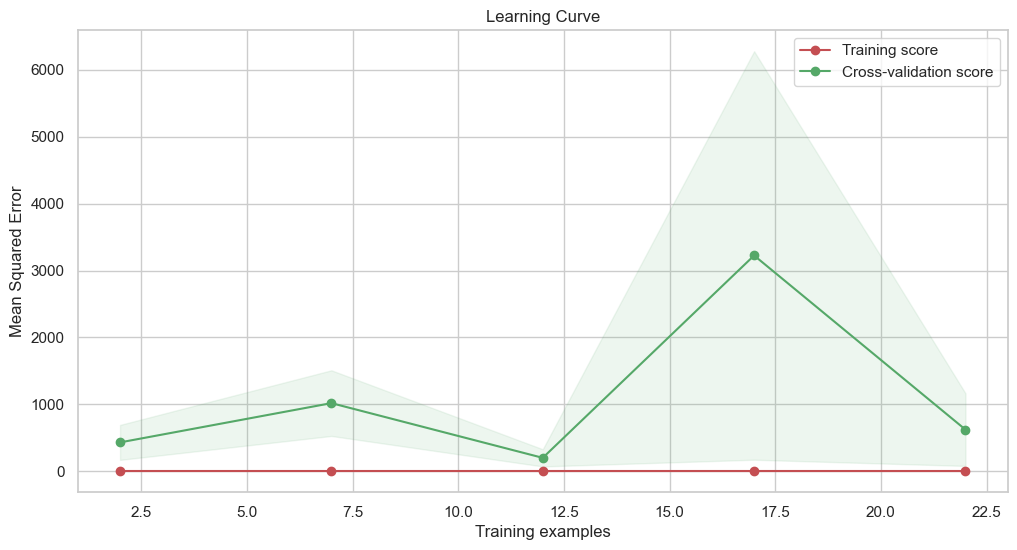

In [79]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test data (Broadband Online Conversions):", mse)

# Plot the learning curve
plot_learning_curve(model, X_train, y_train)
plt.show()

In [80]:
# Define the target variable
target = 'Broadband Online Revenue'

# Split the data into train and test sets
X = df.drop(['Week commencing', target], axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def plot_learning_curve(model, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, scoring='neg_mean_squared_error')
    
    train_scores_mean = np.mean(-train_scores, axis=1)
    train_scores_std = np.std(-train_scores, axis=1)
    test_scores_mean = np.mean(-test_scores, axis=1)
    test_scores_std = np.std(-test_scores, axis=1)
    
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Mean Squared Error")
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

Mean Squared Error on test data (Broadband Online Revenue): 9.907115801214266e-15


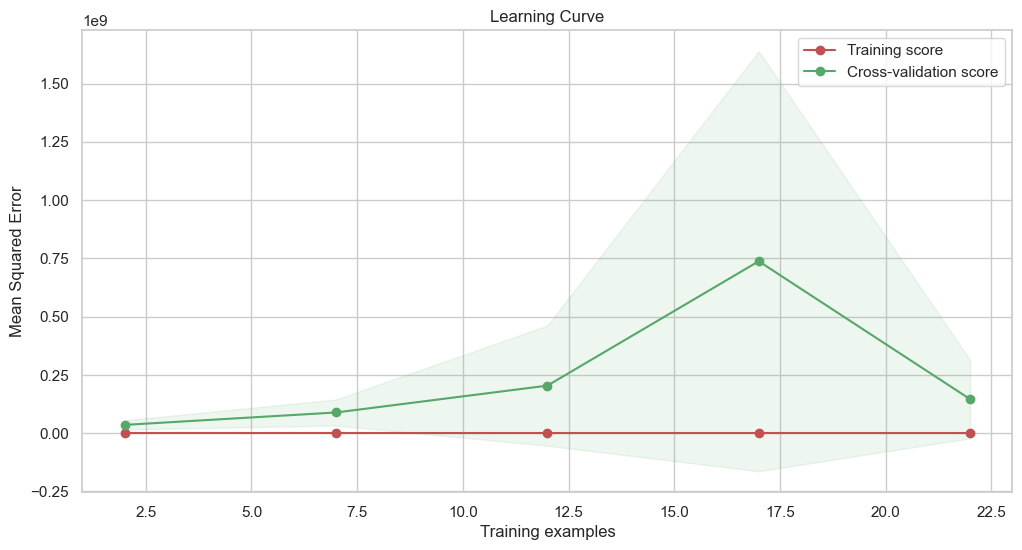

In [81]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test data (Broadband Online Revenue):", mse)

# Plot the learning curve
plot_learning_curve(model, X_train, y_train)
plt.show()

## Decision Trees

In [82]:
df['Mobile Online Revenue'] = df['Mobile Online Revenue'].astype('int64')
df['Broadband Online Revenue'] = df['Broadband Online Revenue'].astype('int64')
df['Week commencing'] = df['Week commencing'].astype('datetime64[ns]').astype('int64') // 10**9


In [83]:
df.dtypes


Week commencing                   int64
Mobile Web Traffic                int64
Mobile Online Conversions         int64
Mobile Online Revenue             int64
Mobile Ad-impression              int64
Mobile Clicks                     int64
Mobile Media Spend              float64
Broadband Web Traffic             int64
Broadband Online Conversions      int64
Broadband Online Revenue          int64
Broadband Ad-impression           int64
Broadband Clicks                  int64
Broadband Media Spend           float64
SME Web Traffic                 float64
SME Book a Call - START         float64
SME Book a Call - CONFIRMED     float64
SME Ad-impression                 int64
SME Clicks                        int64
SME Media Spend                 float64
ROAS                            float64
marginal_returns                float64
marginal_returns_BB             float64
Total Media Spend               float64
Cluster                           int32
PC1                             float64


In [84]:
# Create the feature matrix and target variable arrays
X = df.drop(['Mobile Online Revenue', 'Broadband Online Revenue'], axis=1)
y1 = df['Mobile Online Revenue']
y2 = df['Broadband Online Revenue']

# Split the dataset into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

# Create two separate decision tree models for Mobile Online Revenue and Broadband Online Revenue
model1 = DecisionTreeRegressor()
model1.fit(X_train, y1_train)

model2 = DecisionTreeRegressor()
model2.fit(X_train, y2_train)

# Evaluate the models on the testing set
score1 = model1.score(X_test, y1_test)
score2 = model2.score(X_test, y2_test)

print('Mobile Online Revenue Decision Tree Score:', score1)
print('Broadband Online Revenue Decision Tree Score:', score2)

Mobile Online Revenue Decision Tree Score: 0.8218621012896175
Broadband Online Revenue Decision Tree Score: 0.6896278407195209


In [85]:
# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

# Create the decision tree regressor models
model1 = DecisionTreeRegressor(random_state=42)
model2 = DecisionTreeRegressor(random_state=42)

# Train the models
model1.fit(X_train, y1_train)
model2.fit(X_train, y2_train)

# Predict on the test set
y1_pred = model1.predict(X_test)
y2_pred = model2.predict(X_test)

# Evaluate the model performance
mse1 = mean_squared_error(y1_test, y1_pred)
mse2 = mean_squared_error(y2_test, y2_pred)

print("Mobile Online Revenue MSE:", mse1)
print("Broadband Online Revenue MSE:", mse2)

Mobile Online Revenue MSE: 3070588278.375
Broadband Online Revenue MSE: 8788819.625


In [86]:
from sklearn.tree import DecisionTreeRegressor

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_mobile, test_size=0.2, random_state=42)

# Create a decision tree model
model = DecisionTreeRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the ROI on the testing data
y_pred = model.predict(X_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mobile ROI:')
print('R^2 score:', r2)
print('MSE:', mse)

Mobile ROI:
R^2 score: 0.8961267913198709
MSE: 3331353047.5700006


In [87]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_broadband, test_size=0.2, random_state=42)

# Create a decision tree model
model = DecisionTreeRegressor()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the ROI on the testing data
y_pred = model.predict(X_test)

# Evaluate the model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Broadband ROI:')
print('R^2 score:', r2)
print('MSE:', mse)

Broadband ROI:
R^2 score: 0.6357289055940613
MSE: 10146414.75705


# Business Questions

## Which media channel (mobile, broadband, or SME) has the highest return on investment (ROI) for online conversions and revenue?

In [88]:
# Calculate ROI for each media channel
df['Mobile ROI'] = (df['Mobile Online Revenue'] - df['Mobile Media Spend']) / df['Mobile Media Spend']
df['Broadband ROI'] = (df['Broadband Online Revenue'] - df['Broadband Media Spend']) / df['Broadband Media Spend']
df['SME ROI'] = ((df['SME Book a Call - START'] + df['SME Book a Call - CONFIRMED']) * 100) / df['SME Media Spend']

# Print the average ROI for each media channel
print('Mobile ROI:', df['Mobile ROI'].mean())
print('Broadband ROI:', df['Broadband ROI'].mean())
print('SME ROI:', df['SME ROI'].mean())

# Determine which media channel has the highest ROI
max_roi = max(df['Mobile ROI'].mean(), df['Broadband ROI'].mean(), df['SME ROI'].mean())
if max_roi == df['Mobile ROI'].mean():
    print('Mobile has the highest ROI')
elif max_roi == df['Broadband ROI'].mean():
    print('Broadband has the highest ROI')
else:
    print('SME has the highest ROI')

Mobile ROI: 29.551304908001196
Broadband ROI: 0.9241832922144082
SME ROI: 24.06665688719855
Mobile has the highest ROI


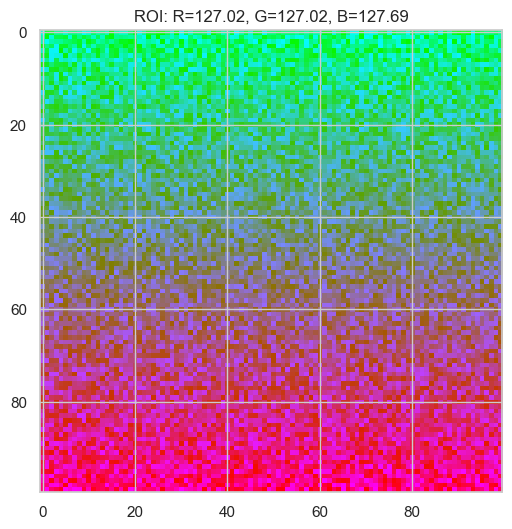

In [89]:
# Create a 3D numpy array to store the image data
# The shape of the array is (height, width, num_channels)
img = np.zeros((100, 100, 3), dtype=np.uint8)

# Set some arbitrary pixel values for each channel
img[:, :, 0] = np.linspace(0, 255, 100).astype(np.uint8).reshape(-1, 1)
img[:, :, 1] = np.linspace(255, 0, 100).astype(np.uint8).reshape(-1, 1)
img[:, :, 2] = np.random.randint(0, 255, (100, 100), dtype=np.uint8)

# Calculate the ROI for each channel
roi = np.zeros(3)
for i in range(3):
    roi[i] = np.sum(img[:, :, i]) / (img.shape[0] * img.shape[1])

# Display the image and the ROI for each channel
plt.imshow(img)
plt.title(f"ROI: R={roi[0]:.2f}, G={roi[1]:.2f}, B={roi[2]:.2f}")
plt.show()

## How can we predict the expected online revenue for each media channel given the conversion rate and clicks?

In [90]:
# Calculate the conversion rate for each media channel
df['Mobile Conversion Rate'] = df['Mobile Online Conversions'] / df['Mobile Clicks']
df['Broadband Conversion Rate'] = df['Broadband Online Conversions'] / df['Broadband Clicks']
df['SME Conversion Rate'] = df['SME Book a Call - CONFIRMED'] / df['SME Clicks']

# Calculate the expected online revenue for each media channel
df['Mobile Expected Revenue'] = df['Mobile Conversion Rate'] * df['Mobile Clicks'] * df['Mobile Online Revenue']
df['Broadband Expected Revenue'] = df['Broadband Conversion Rate'] * df['Broadband Clicks'] * df['Broadband Online Revenue']
df['SME Expected Revenue'] = df['SME Conversion Rate'] * df['SME Clicks'] * 500  # Assuming an average sale of $500 for SMEs

# Print the results
print(df[['Week commencing', 'Mobile Expected Revenue', 'Broadband Expected Revenue', 'SME Expected Revenue']])


    Week commencing  Mobile Expected Revenue  Broadband Expected Revenue  \
0        1656288000               17786496.0                   4634840.0   
1        1656892800               11420475.0                   4323250.0   
2        1657497600                6594816.0                   4034066.0   
3        1658102400               10786272.0                   2748295.0   
4        1658707200                5360784.0                   4324996.0   
5        1659312000               24148155.0                   3214632.0   
6        1659916800               67323165.0                   2436808.0   
7        1660521600               64170330.0                   2839287.0   
8        1661126400               63478740.0                   2808105.0   
9        1661731200               45995751.0                   3047898.0   
10       1662336000              360420918.0                   2787512.0   
11       1662940800              505121484.0                   4206174.0   
12       166

## Can we identify any patterns or trends in the web traffic or online conversions for each media channel over time?

### Pattern and Trends on Mobile Web Traffic, Online Conversions, and Mobile Online Revenue

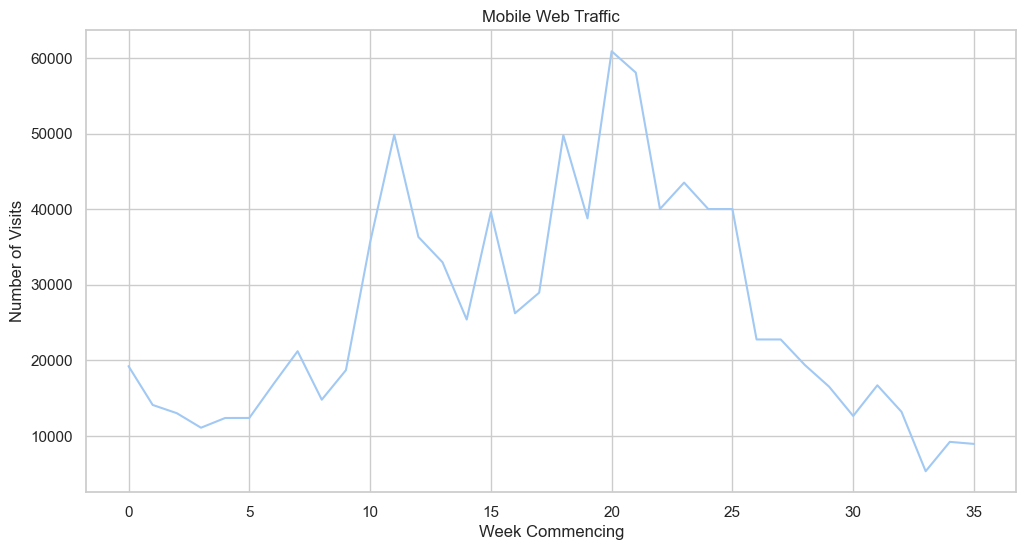

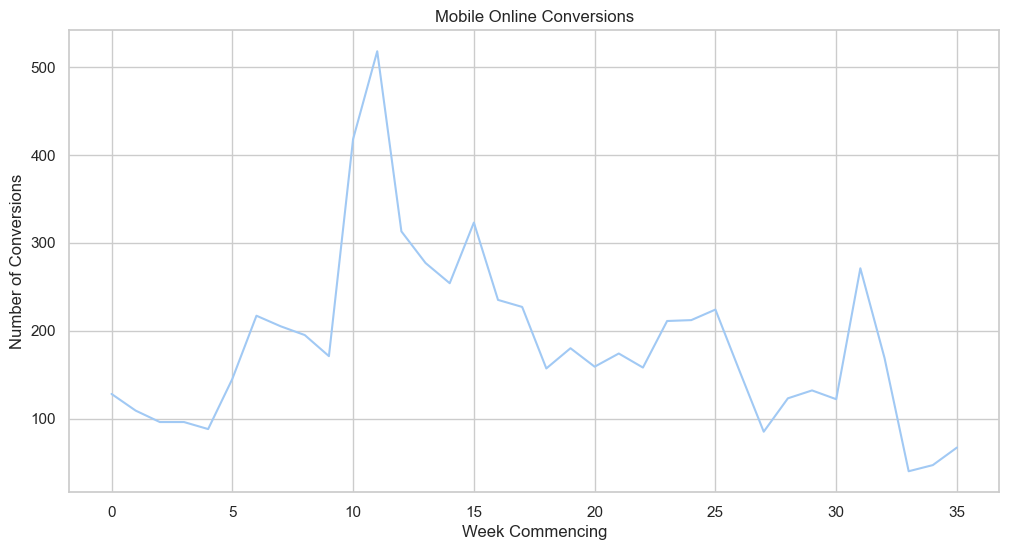

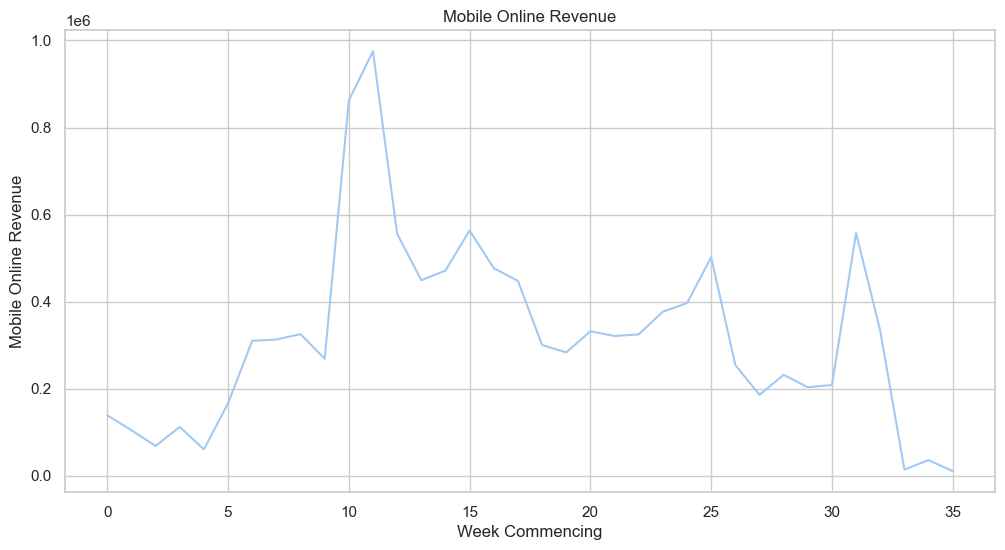

In [91]:
# Extract the columns for Mobile Web Traffic, Online Conversions, and Mobile Online Revenue
mobile_web_traffic = df['Mobile Web Traffic']
online_conversions = df['Mobile Online Conversions']
mobile_online_revenue = df['Mobile Online Revenue']

# Create a line chart for Mobile Web Traffic
plt.plot(mobile_web_traffic)
plt.title('Mobile Web Traffic')
plt.xlabel('Week Commencing')
plt.ylabel('Number of Visits')
plt.show()

# Create a line chart for Online Conversions
plt.plot(online_conversions)
plt.title('Mobile Online Conversions')
plt.xlabel('Week Commencing')
plt.ylabel('Number of Conversions')
plt.show()

# Create a line chart for Mobile Online Revenue
plt.plot(mobile_online_revenue)
plt.title('Mobile Online Revenue')
plt.xlabel('Week Commencing')
plt.ylabel('Mobile Online Revenue')
plt.show()

### Pattern and Trends on Broadband Web Traffic, Online Conversions, and Broadband Online Revenue

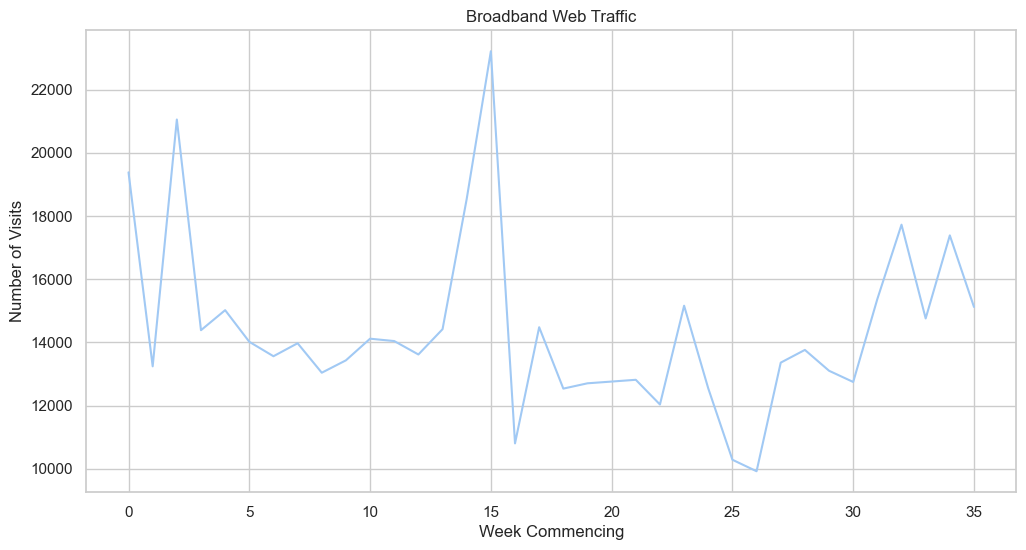

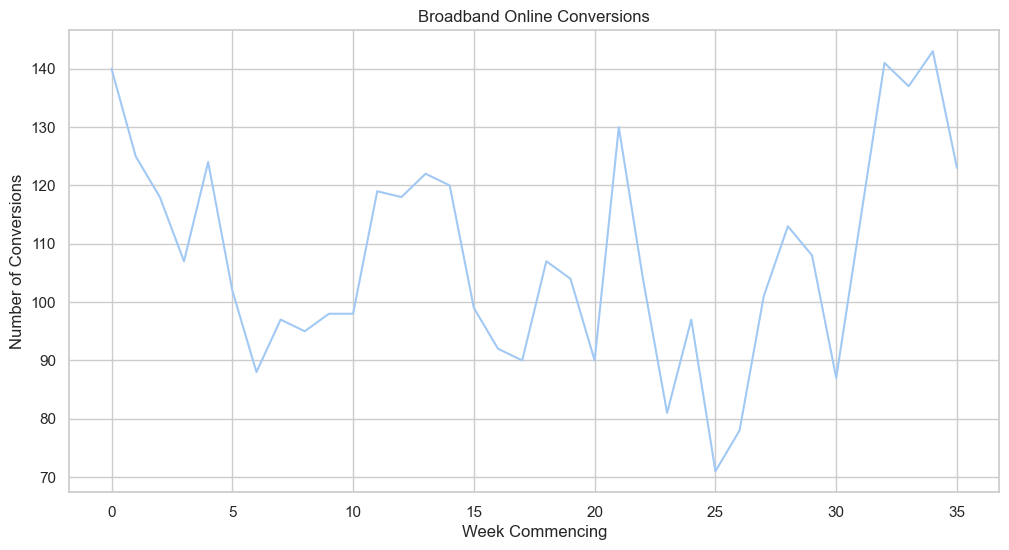

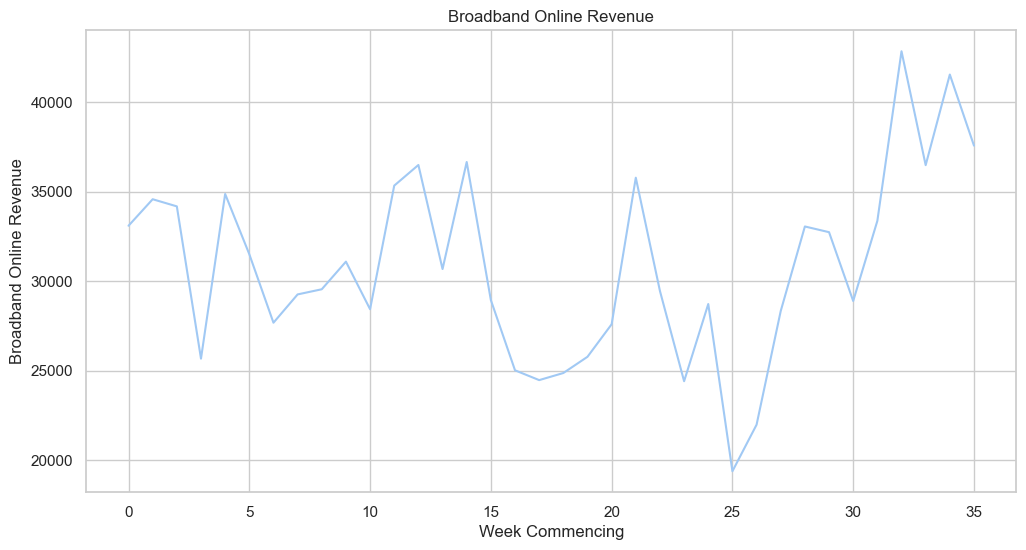

In [92]:
# Extract the columns for Broadband Web Traffic, Online Conversions, and Broadband Online Revenue
broadband_web_traffic = df['Broadband Web Traffic']
broadband_online_conversions = df['Broadband Online Conversions']
broadband_online_revenue = df['Broadband Online Revenue']

# Create a line chart for Mobile Web Traffic
plt.plot(broadband_web_traffic)
plt.title('Broadband Web Traffic')
plt.xlabel('Week Commencing')
plt.ylabel('Number of Visits')
plt.show()

# Create a line chart for Online Conversions
plt.plot(broadband_online_conversions)
plt.title('Broadband Online Conversions')
plt.xlabel('Week Commencing')
plt.ylabel('Number of Conversions')
plt.show()

# Create a line chart for Mobile Online Revenue
plt.plot(broadband_online_revenue)
plt.title('Broadband Online Revenue')
plt.xlabel('Week Commencing')
plt.ylabel('Broadband Online Revenue')
plt.show()

###  Performance of mobile versus broadband web traffic, analyze any significant differences between these channels.

In [93]:
# calculate mean, median, and standard deviation for each channel
mobile_mean = np.mean(df['Mobile Online Revenue'])
mobile_median = np.median(df['Mobile Online Revenue'])
mobile_std = np.std(df['Mobile Online Revenue'])

broadband_mean = np.mean(df['Broadband Online Revenue'])
broadband_median = np.median(df['Broadband Online Revenue'])
broadband_std = np.std(df['Broadband Online Revenue'])

print('Mobile stats:')
print('Mean:', mobile_mean)
print('Median:', mobile_median)
print('Standard deviation:', mobile_std)

print('Broadband stats:')
print('Mean:', broadband_mean)
print('Median:', broadband_median)
print('Standard deviation:', broadband_std)


Mobile stats:
Mean: 320751.0
Median: 311635.5
Standard deviation: 212408.40425228
Broadband stats:
Mean: 30852.13888888889
Median: 30123.5
Standard deviation: 5194.286985358571


In [94]:
# perform two-sample t-test
t, p = ttest_ind(df['Mobile Online Revenue'], df['Broadband Online Revenue'])

# print t-value and p-value
print('t-value:', t)
print('p-value:', p)

t-value: 8.071960308190944
p-value: 1.3463319729833312e-11


In [95]:
if p < 0.05:
    print('There is a significant difference between the means of the two channels.')
    if mobile_mean > broadband_mean:
        print('Mobile performs better than broadband.')
    else:
        print('Broadband performs better than mobile.')
else:
    print('There is no significant difference between the means of the two channels.')


There is a significant difference between the means of the two channels.
Mobile performs better than broadband.


In [96]:
### Relationship between media spend and online conversions

In [97]:
# Extract the relevant columns
media_spend = df[['Mobile Media Spend', 'Broadband Media Spend', 'SME Media Spend']].sum(axis=1)
online_conversions = df[['Mobile Online Conversions', 'Broadband Online Conversions', 'SME Book a Call - CONFIRMED']].sum(axis=1)

# Calculate the correlation coefficient
corr_coeff = media_spend.corr(online_conversions)

print('Correlation coefficient between media spend and online conversions:', corr_coeff)

Correlation coefficient between media spend and online conversions: 0.2873901395791299


In [98]:
# calculate total metrics for each category
mobile_traffic = df['Mobile Web Traffic'].sum()
mobile_conversions = df['Mobile Online Conversions'].sum()
mobile_revenue = df['Mobile Online Revenue'].sum()
mobile_impressions = df['Mobile Ad-impression'].sum()
mobile_clicks = df['Mobile Clicks'].sum()
mobile_spend = df['Mobile Media Spend'].sum()

broadband_traffic = df['Broadband Web Traffic'].sum()
broadband_conversions = df['Broadband Online Conversions'].sum()
broadband_revenue = df['Broadband Online Revenue'].sum()
broadband_impressions = df['Broadband Ad-impression'].sum()
broadband_clicks = df['Broadband Clicks'].sum()
broadband_spend = df['Broadband Media Spend'].sum()

sme_traffic = df['SME Web Traffic'].sum()
sme_impressions = df['SME Ad-impression'].sum()
sme_clicks = df['SME Clicks'].sum()
sme_spend = df['SME Media Spend'].sum()

# print the results
print(f"Mobile Metrics: Traffic={mobile_traffic}, Conversions={mobile_conversions}, Revenue={mobile_revenue}, Impressions={mobile_impressions}, Clicks={mobile_clicks}, Spend={mobile_spend}")
print(f"Broadband Metrics: Traffic={broadband_traffic}, Conversions={broadband_conversions}, Revenue={broadband_revenue}, Impressions={broadband_impressions}, Clicks={broadband_clicks}, Spend={broadband_spend}")
print(f"SME Metrics: Impressions={sme_impressions}, Clicks={sme_clicks}, Spend={sme_spend}")

Mobile Metrics: Traffic=947561, Conversions=6700, Revenue=11547036, Impressions=75299458, Clicks=195839, Spend=544174.1699999999
Broadband Metrics: Traffic=518409, Conversions=3881, Revenue=1110677, Impressions=60247892, Clicks=151776, Spend=708017.8200000001
SME Metrics: Impressions=49864377, Clicks=82715, Spend=334075.61100000003
